In [170]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "url-data-for-phishing-website-detection"

# **Import**

In [171]:
library(dplyr)
library(ggplot2)
library(gridExtra)
library(psych)
library(ggcorrplot)
library(skimr)

# **1. Data Import & EDA**

In [172]:
df <- read.csv('/kaggle/input/url-data-for-phishing-website-detection/5.urldata.csv')

In [173]:
str(df)

'data.frame':	10000 obs. of  18 variables:
 $ Domain       : chr  "graphicriver.net" "ecnavi.jp" "hubpages.com" "extratorrent.cc" ...
 $ Have_IP      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Have_At      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ URL_Length   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ URL_Depth    : int  1 1 1 3 3 4 2 6 2 5 ...
 $ Redirection  : int  0 1 0 0 0 0 0 0 0 0 ...
 $ https_Domain : int  0 0 0 0 0 0 0 0 0 0 ...
 $ TinyURL      : int  0 0 0 0 0 1 0 0 0 0 ...
 $ Prefix.Suffix: int  0 0 0 0 0 0 0 0 0 0 ...
 $ DNS_Record   : int  0 0 0 0 0 0 1 0 0 0 ...
 $ Web_Traffic  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Domain_Age   : int  1 1 0 0 0 1 1 0 0 0 ...
 $ Domain_End   : int  1 1 1 1 1 1 1 0 0 1 ...
 $ iFrame       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Mouse_Over   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Right_Click  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Web_Forwards : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Label        : int  0 0 0 0 0 0 0 0 0 0 ...


In [174]:
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Domain*,1,10000,1859.7321,1.011169e+03,1945.5,1879.461750,1360.2855,1,3553,3552,-0.09887779,-1.2329993,1.011169e+01
Have_IP,2,10000,0.0055,7.396146e-02,0.0,0.000000,0.0000,0,1,1,13.37049253,176.7877493,7.396146e-04
Have_At,3,10000,0.0226,1.486319e-01,0.0,0.000000,0.0000,0,1,1,6.42328033,39.2624564,1.486319e-03
URL_Length,4,10000,0.7734,4.186526e-01,1.0,0.841750,0.0000,0,1,1,-1.30596435,-0.2944865,4.186526e-03
URL_Depth,5,10000,3.0720,2.128631e+00,3.0,2.858125,1.4826,0,20,20,1.21899909,2.7357334,2.128631e-02
Redirection,6,10000,0.0135,1.154083e-01,0.0,0.000000,0.0000,0,1,1,8.43009102,69.0733420,1.154083e-03
https_Domain,7,10000,0.0002,1.414143e-02,0.0,0.000000,0.0000,0,1,1,70.67885999,4994.0006500,1.414143e-04
TinyURL,8,10000,0.0903,2.866254e-01,0.0,0.000000,0.0000,0,1,1,2.85849765,6.1716260,2.866254e-03
Prefix.Suffix,9,10000,0.0932,2.907270e-01,0.0,0.000000,0.0000,0,1,1,2.79822144,5.8306263,2.907270e-03


**Check missing value**

In [175]:
colSums(is.na(df))

Domain       Have_IP       Have_At    URL_Length     URL_Depth 
            0             0             0             0             0 
  Redirection  https_Domain       TinyURL Prefix.Suffix    DNS_Record 
            0             0             0             0             0 
  Web_Traffic    Domain_Age    Domain_End        iFrame    Mouse_Over 
            0             0             0             0             0 
  Right_Click  Web_Forwards         Label 
            0             0             0

**Duplicate check**

In [176]:
sum(duplicated(df))

[1] 5626

In [177]:
summary(df)

    Domain             Have_IP          Have_At         URL_Length    
 Length:10000       Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 Class :character   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:1.0000  
 Mode  :character   Median :0.0000   Median :0.0000   Median :1.0000  
                    Mean   :0.0055   Mean   :0.0226   Mean   :0.7734  
                    3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:1.0000  
                    Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
   URL_Depth       Redirection      https_Domain      TinyURL      
 Min.   : 0.000   Min.   :0.0000   Min.   :0e+00   Min.   :0.0000  
 1st Qu.: 2.000   1st Qu.:0.0000   1st Qu.:0e+00   1st Qu.:0.0000  
 Median : 3.000   Median :0.0000   Median :0e+00   Median :0.0000  
 Mean   : 3.072   Mean   :0.0135   Mean   :2e-04   Mean   :0.0903  
 3rd Qu.: 4.000   3rd Qu.:0.0000   3rd Qu.:0e+00   3rd Qu.:0.0000  
 Max.   :20.000   Max.   :1.0000   Max.   :1e+00   Max.   :1.0000  
 Prefix.Suffix      DNS_Rec

In [178]:
head(df)

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix.Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
2,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
3,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
4,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
5,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
6,nypost.com,0,0,1,4,0,0,1,0,0,1,1,1,0,0,1,0,0


In [179]:
tail(df)

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix.Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
9995,info.lionnets.com,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1
9996,wvk12-my.sharepoint.com,0,0,1,5,0,0,1,1,0,1,1,1,0,0,1,0,1
9997,adplife.com,0,0,1,4,0,0,0,0,0,1,0,1,0,0,1,0,1
9998,kurortnoye.com.ua,0,1,1,3,0,0,1,0,0,0,1,1,1,0,1,0,1
9999,norcaltc-my.sharepoint.com,0,0,1,5,0,0,1,1,0,1,1,1,0,0,1,0,1
10000,sieck-kuehlsysteme.de,0,1,1,4,0,0,1,1,0,1,1,1,0,0,1,0,1


# **2. Data Visualization for Visualization**

In [180]:
num_cols <- {}

for(i in 1:length(df)){
    if(is.numeric(df[[i]]) == TRUE)
        num_cols <- c(num_cols ,colnames(df[i]))
}

In [181]:
options(repr.plot.width = 16.0, repr.plot.height = 8.0)

## **Histogram & Densityplot**

Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”
Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”
Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


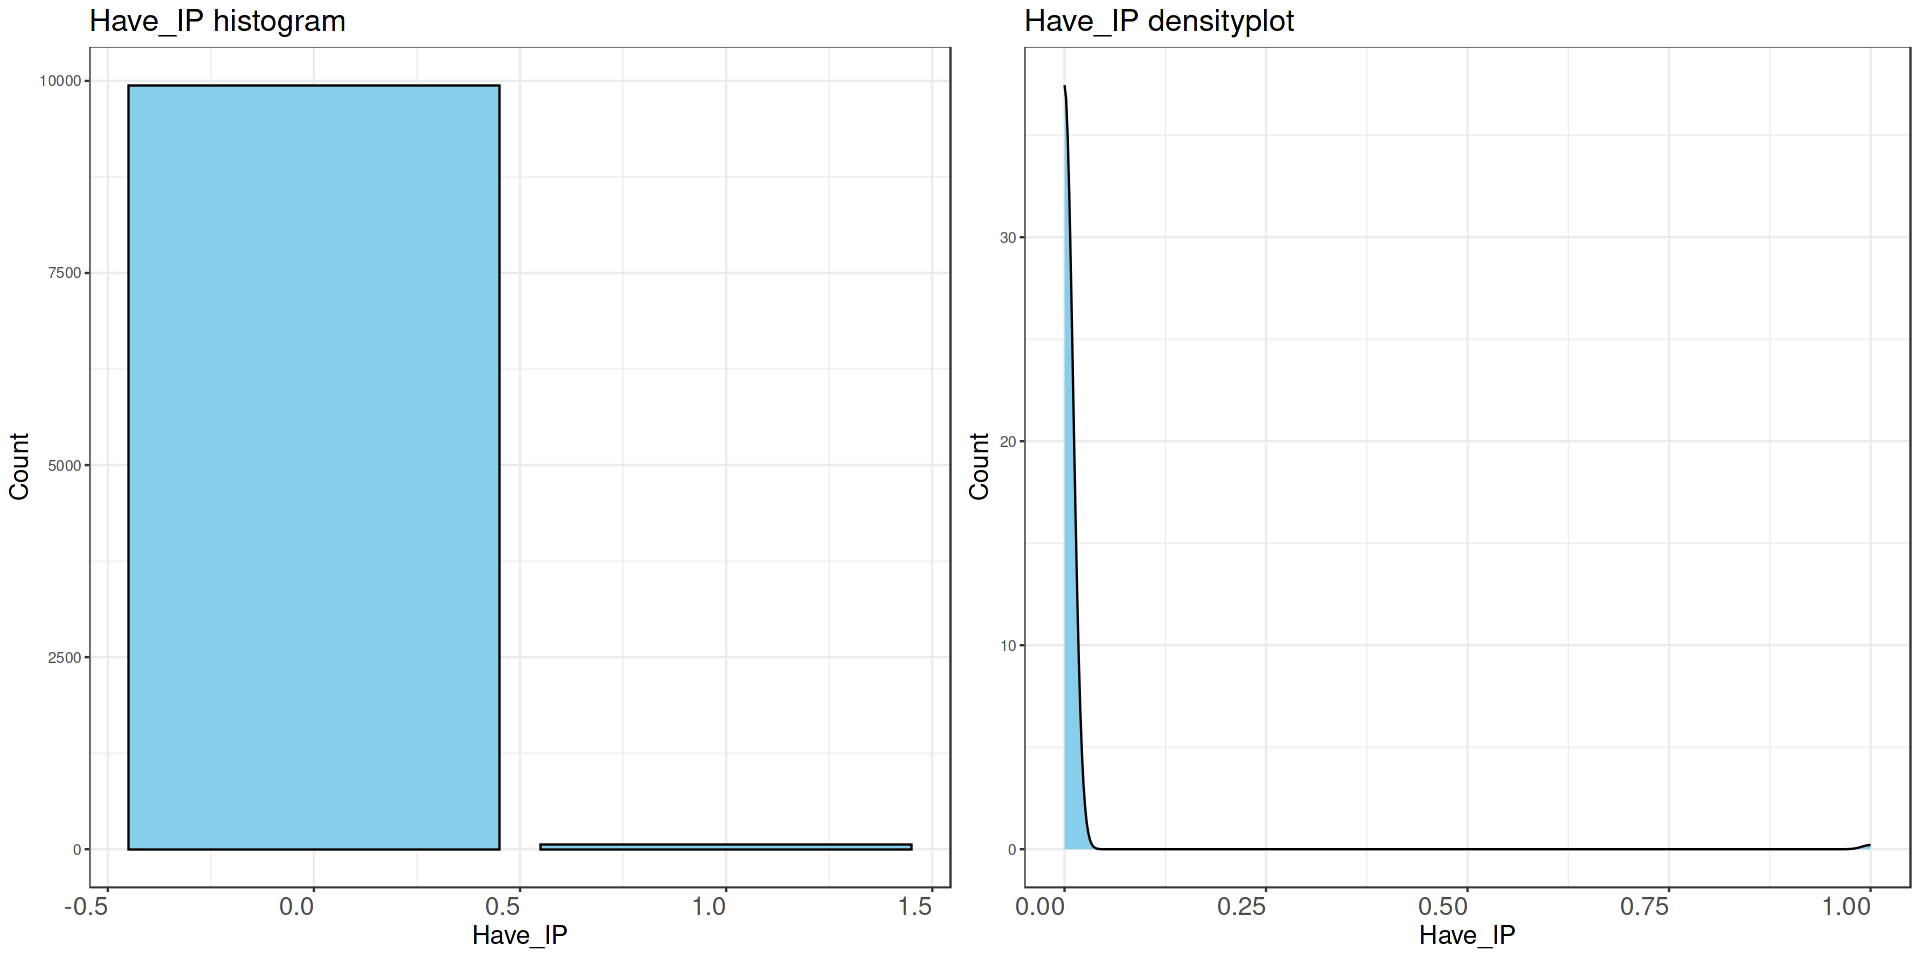

Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


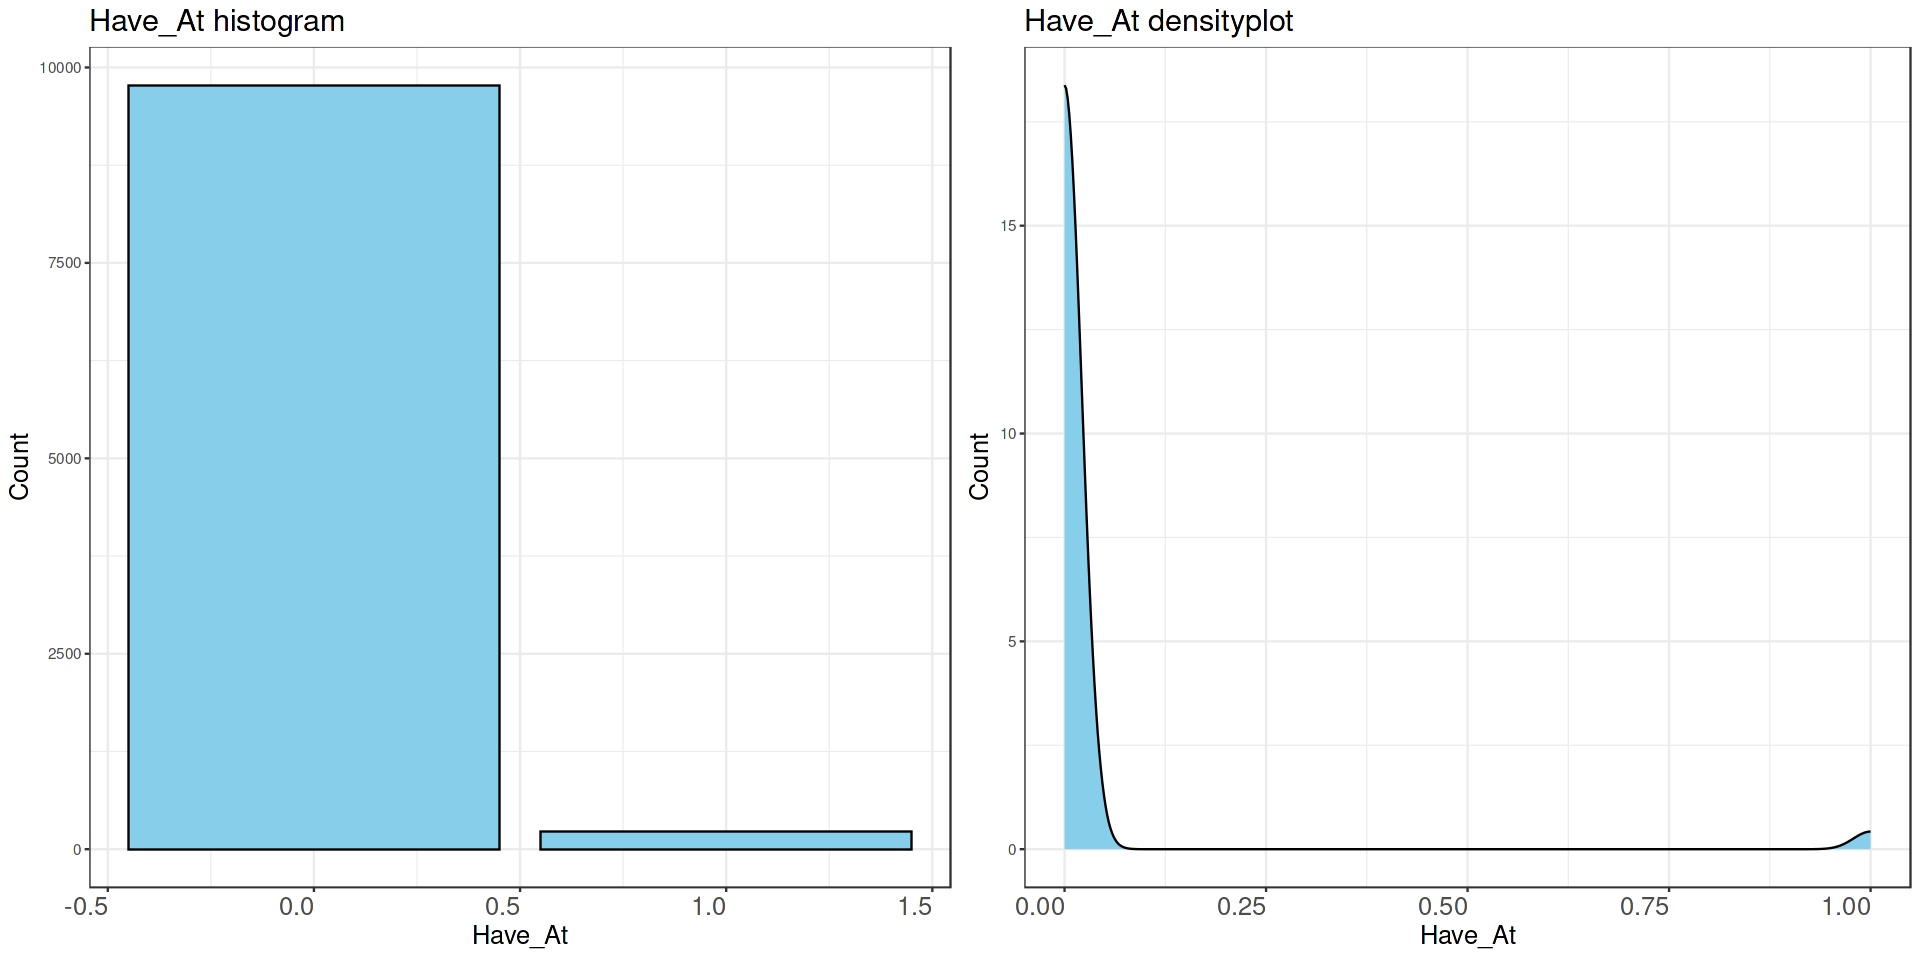

Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


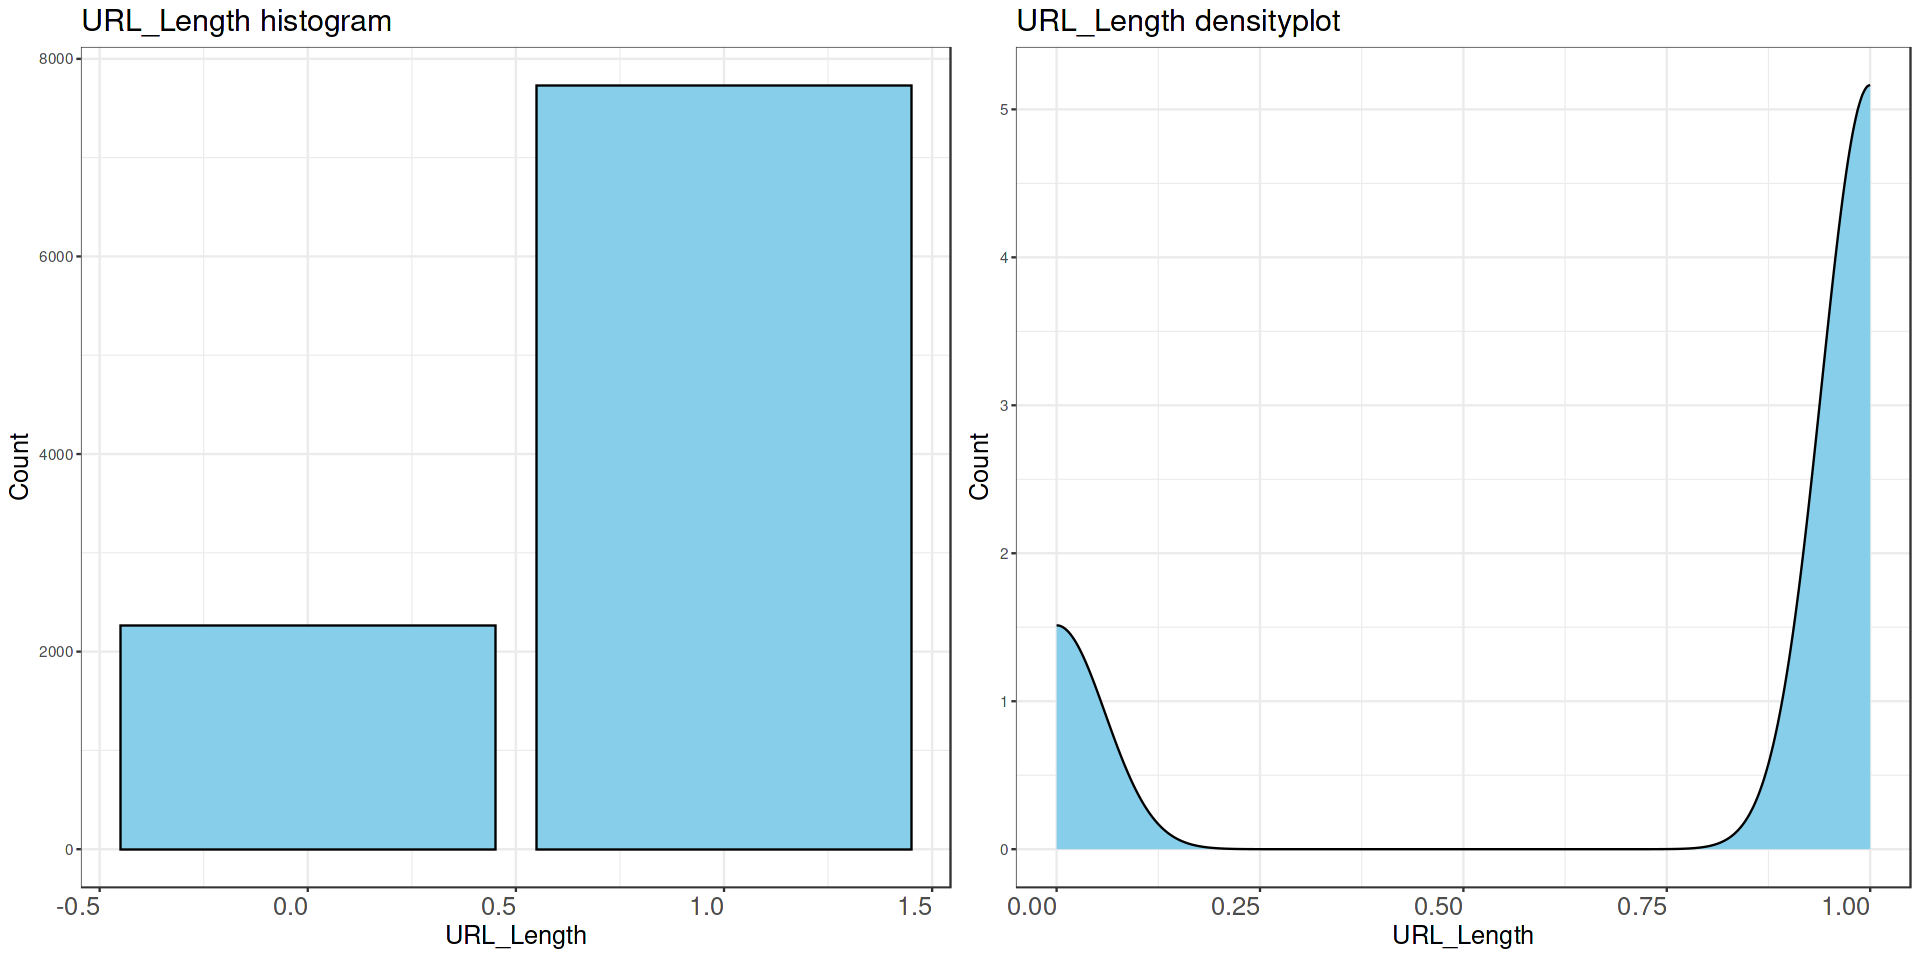

Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


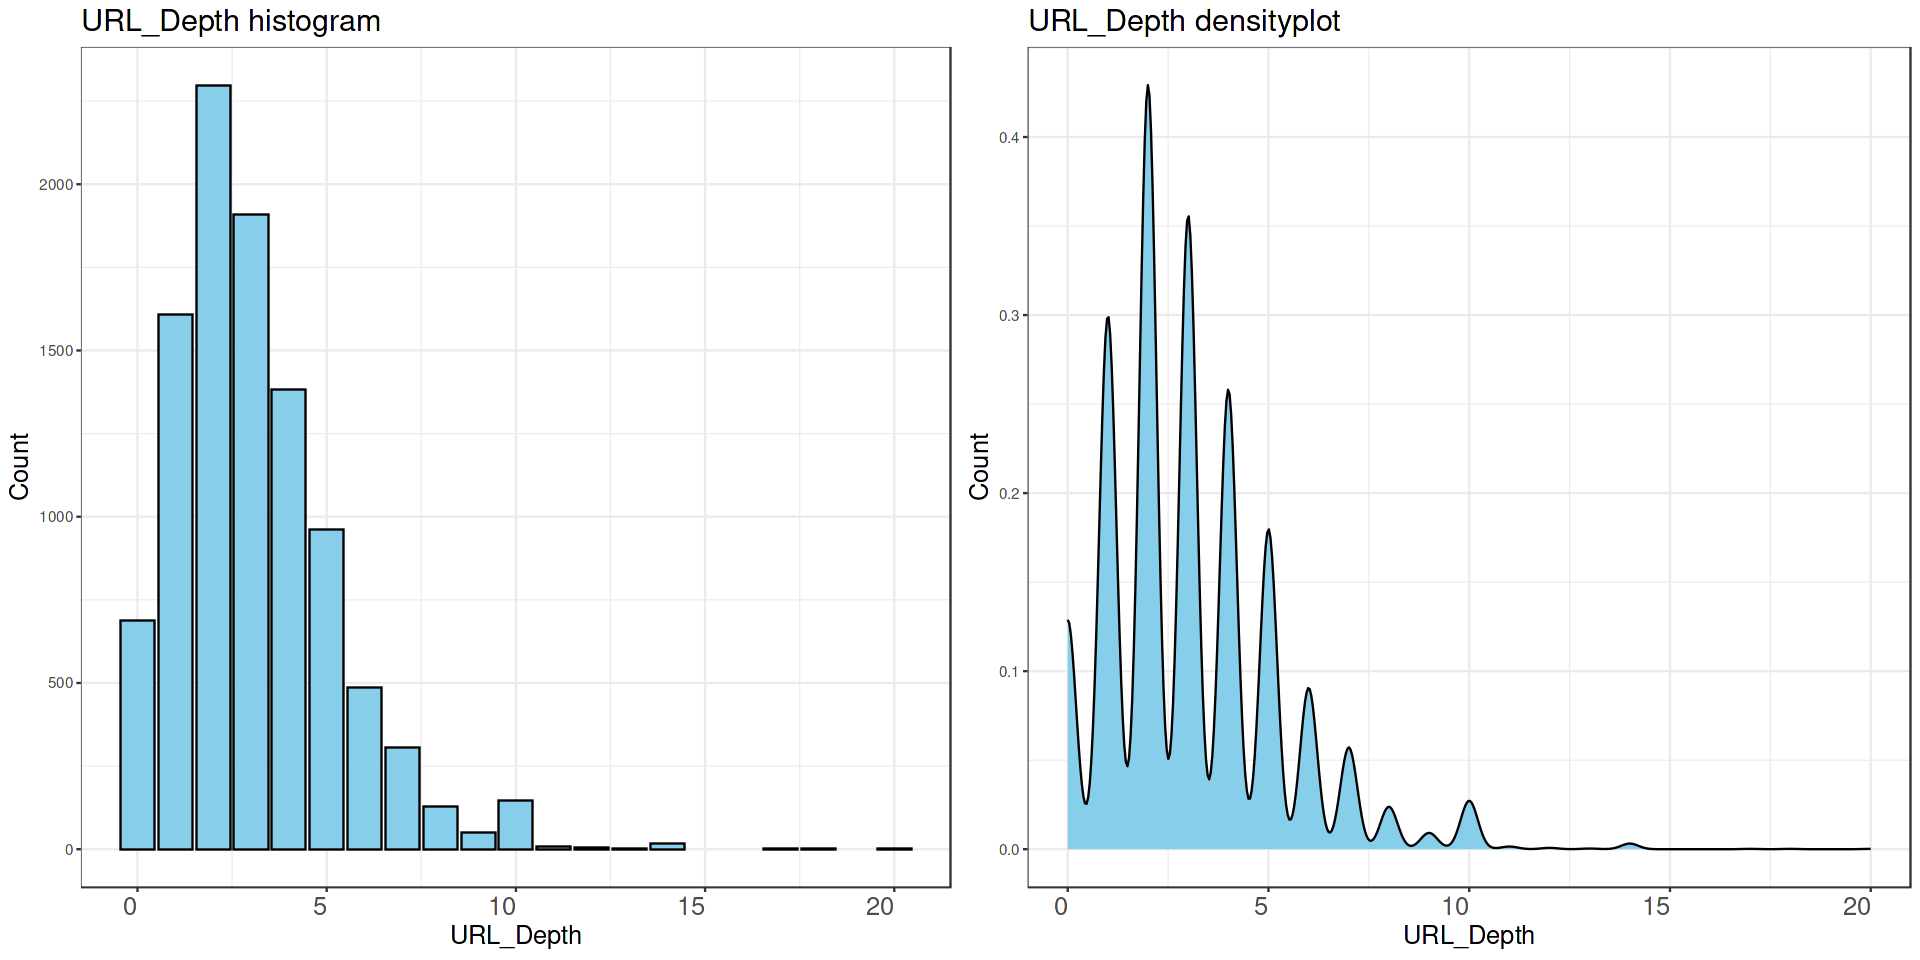

Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


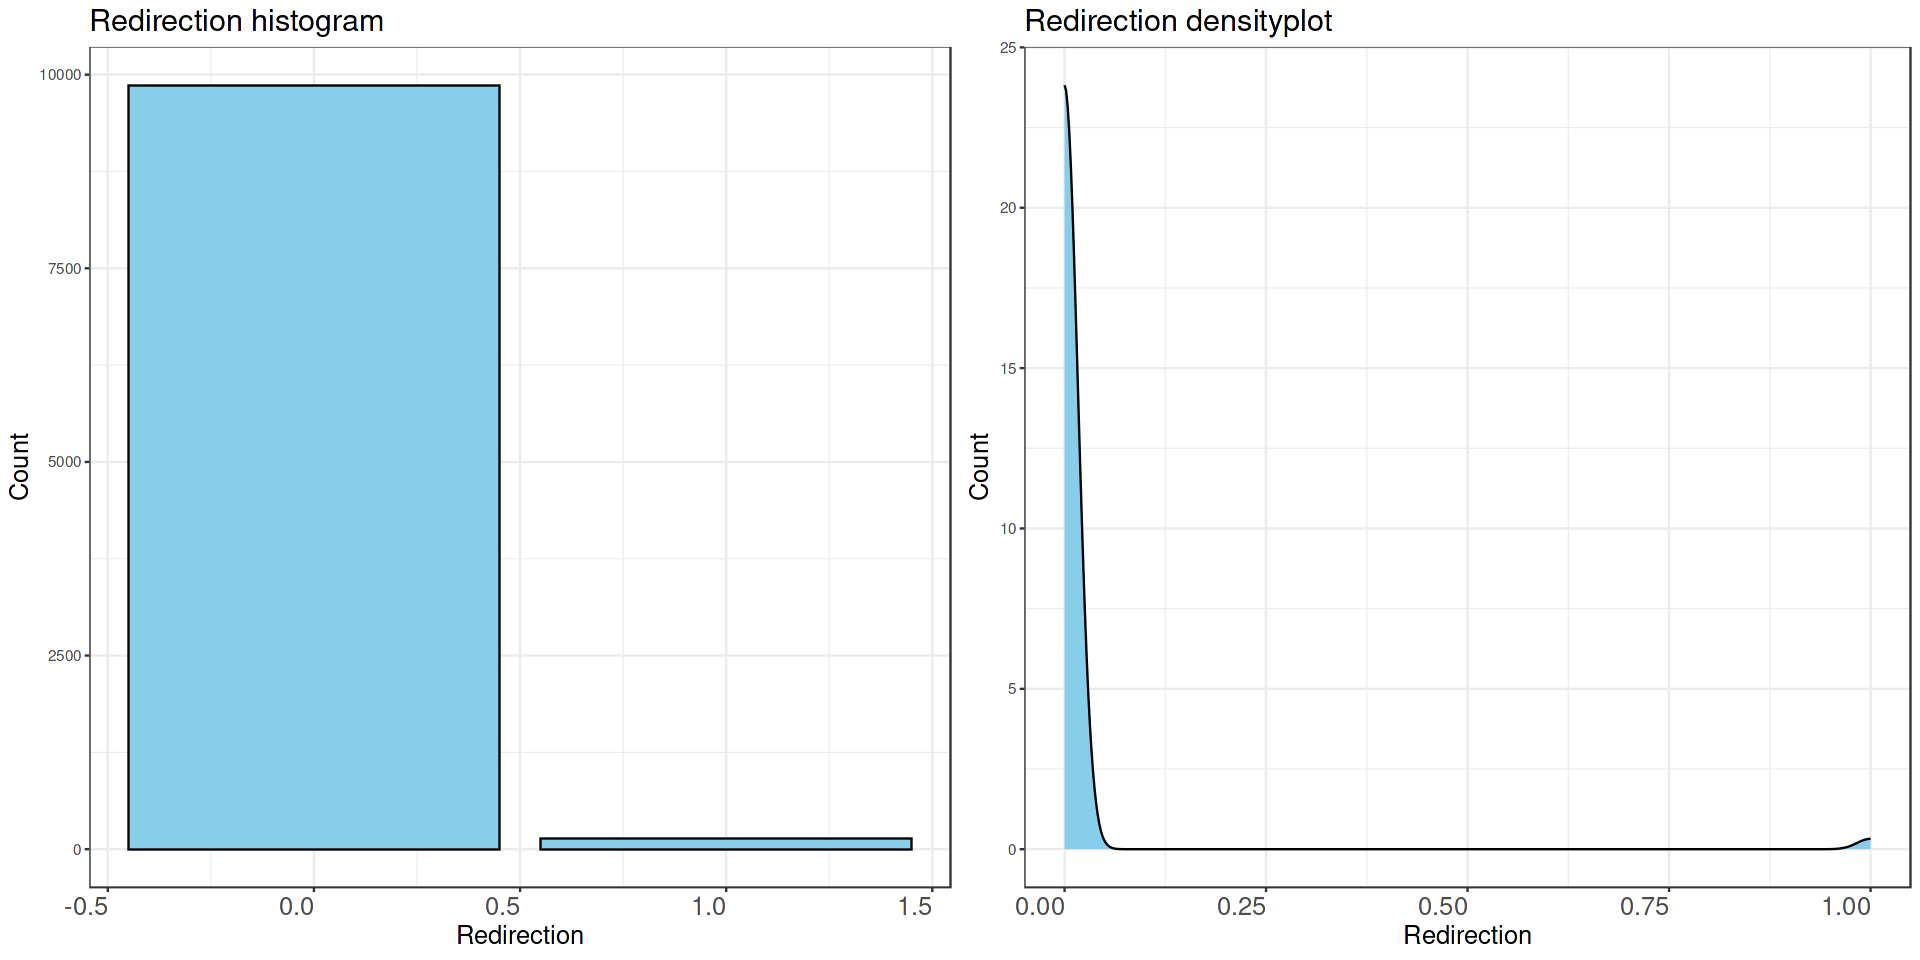

Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


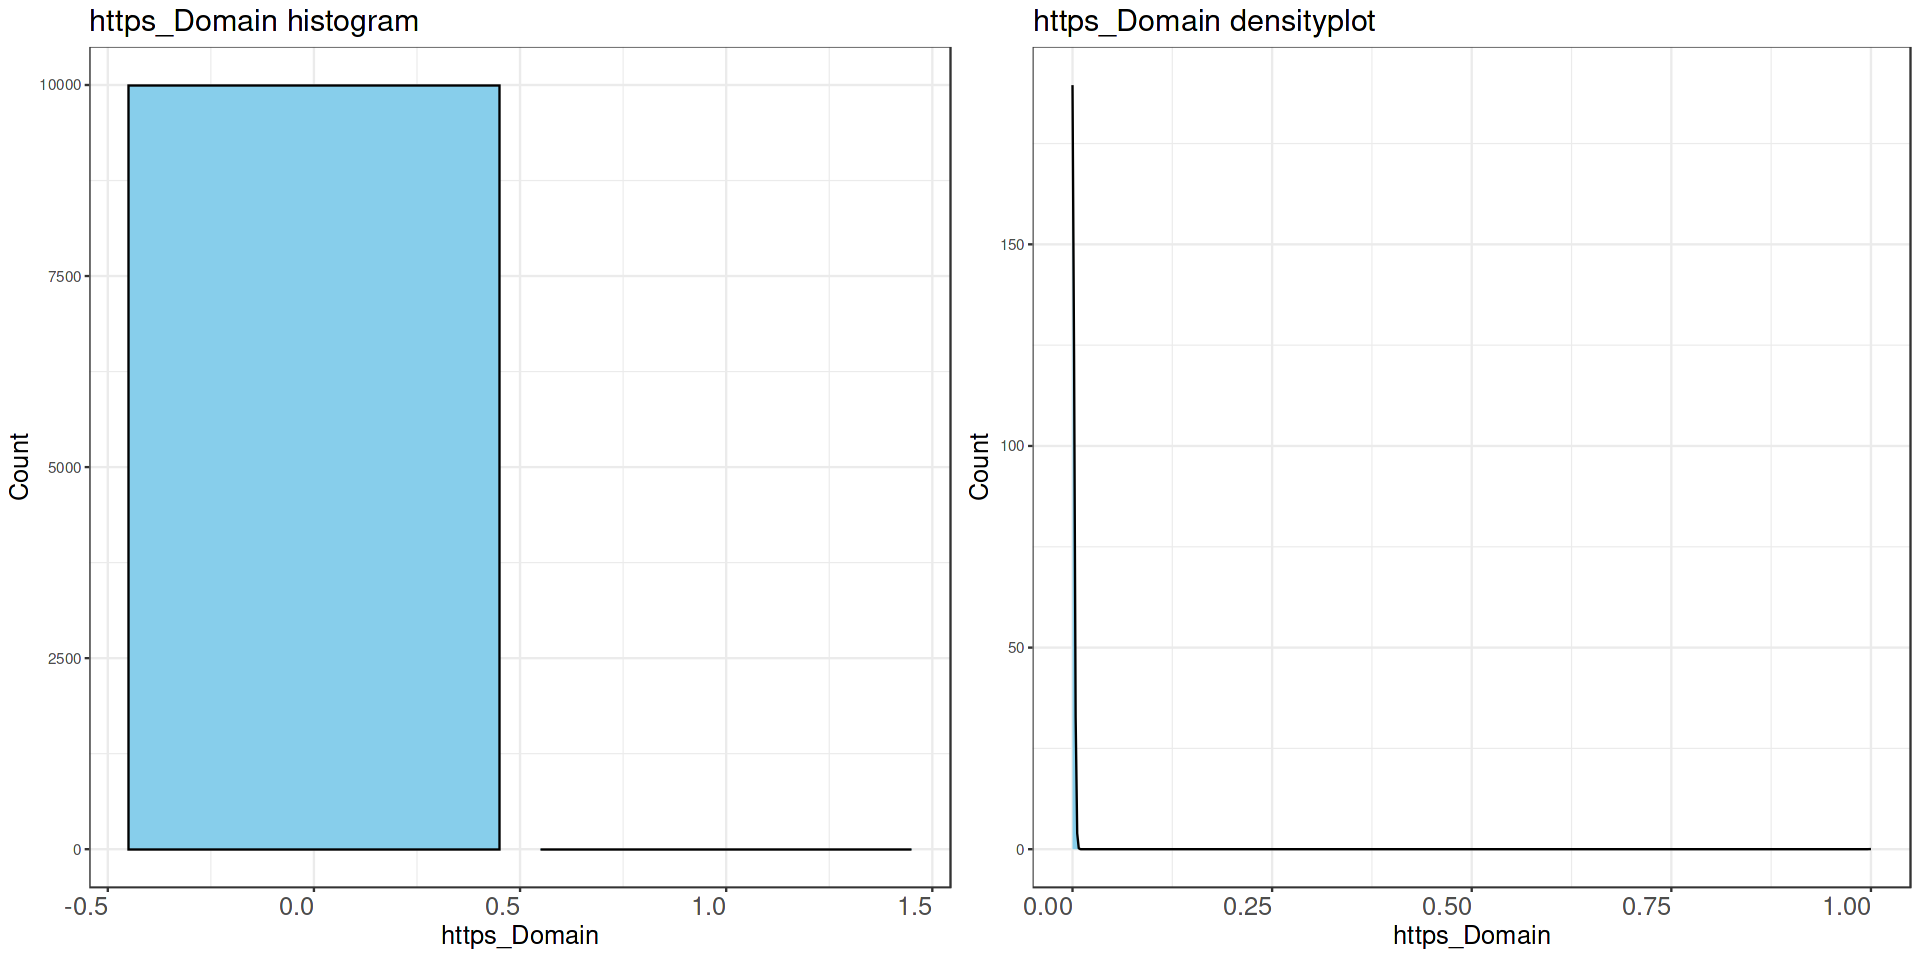

Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


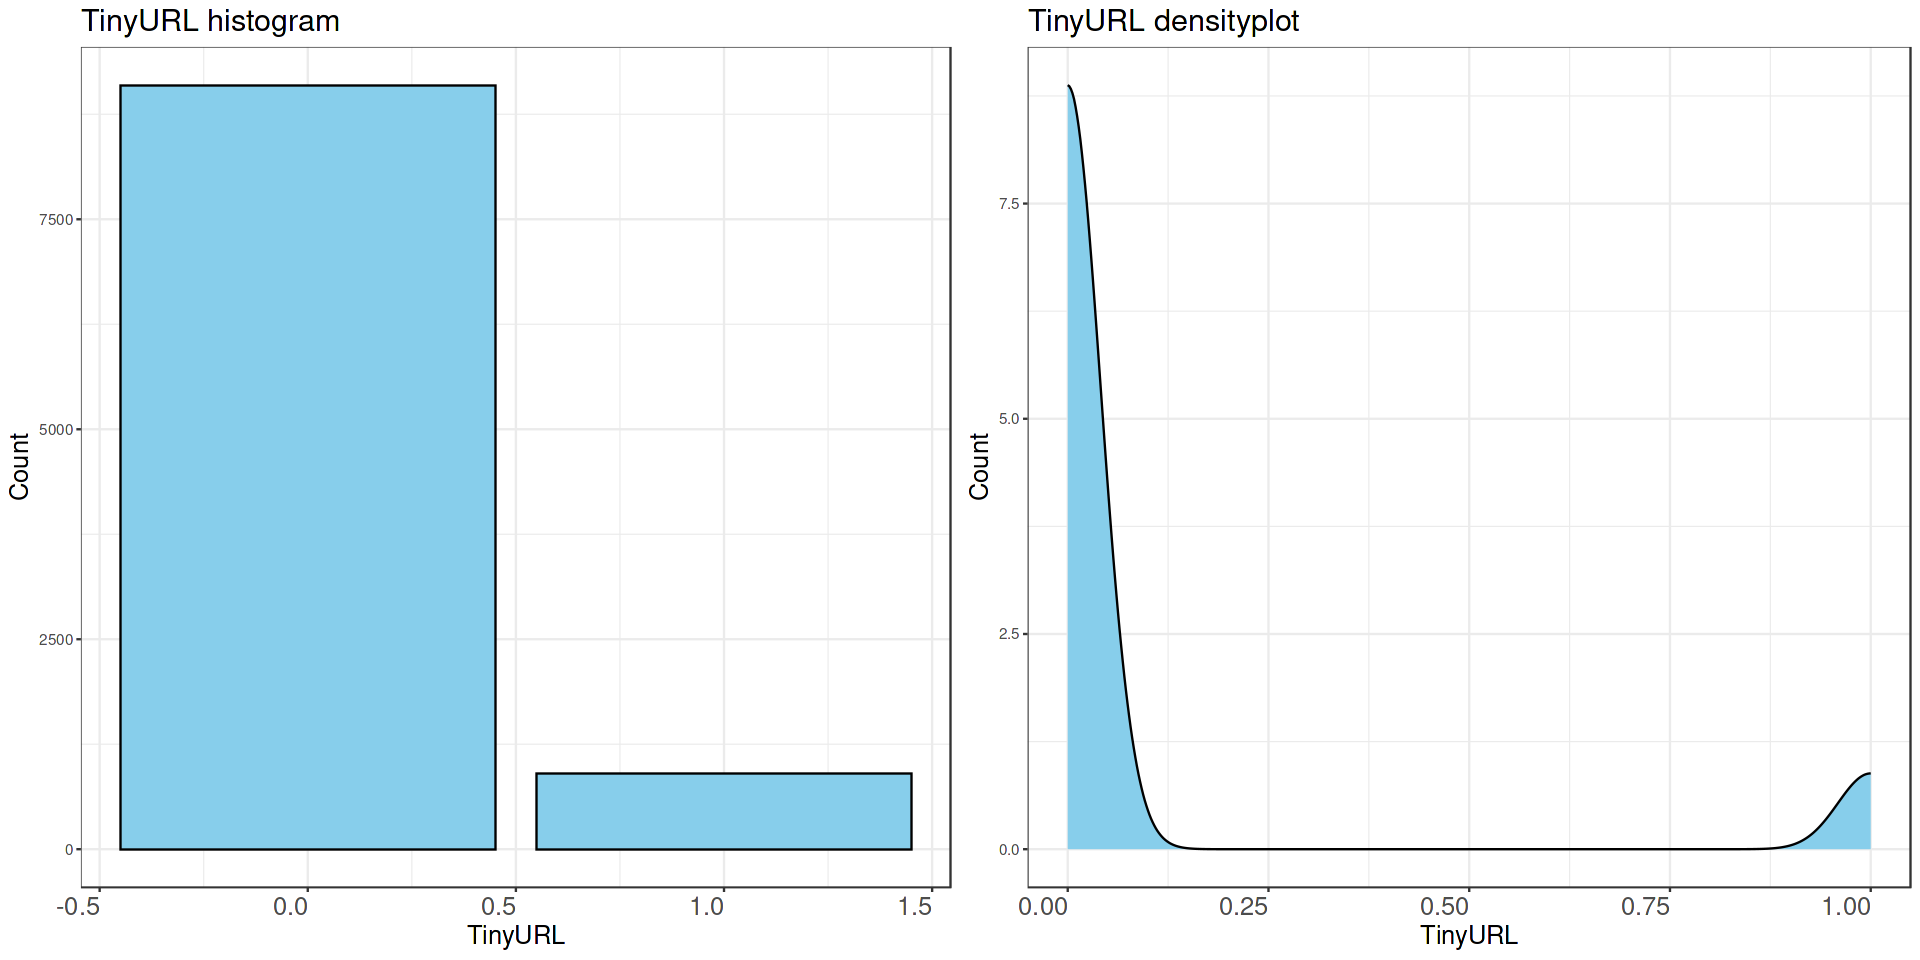

Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


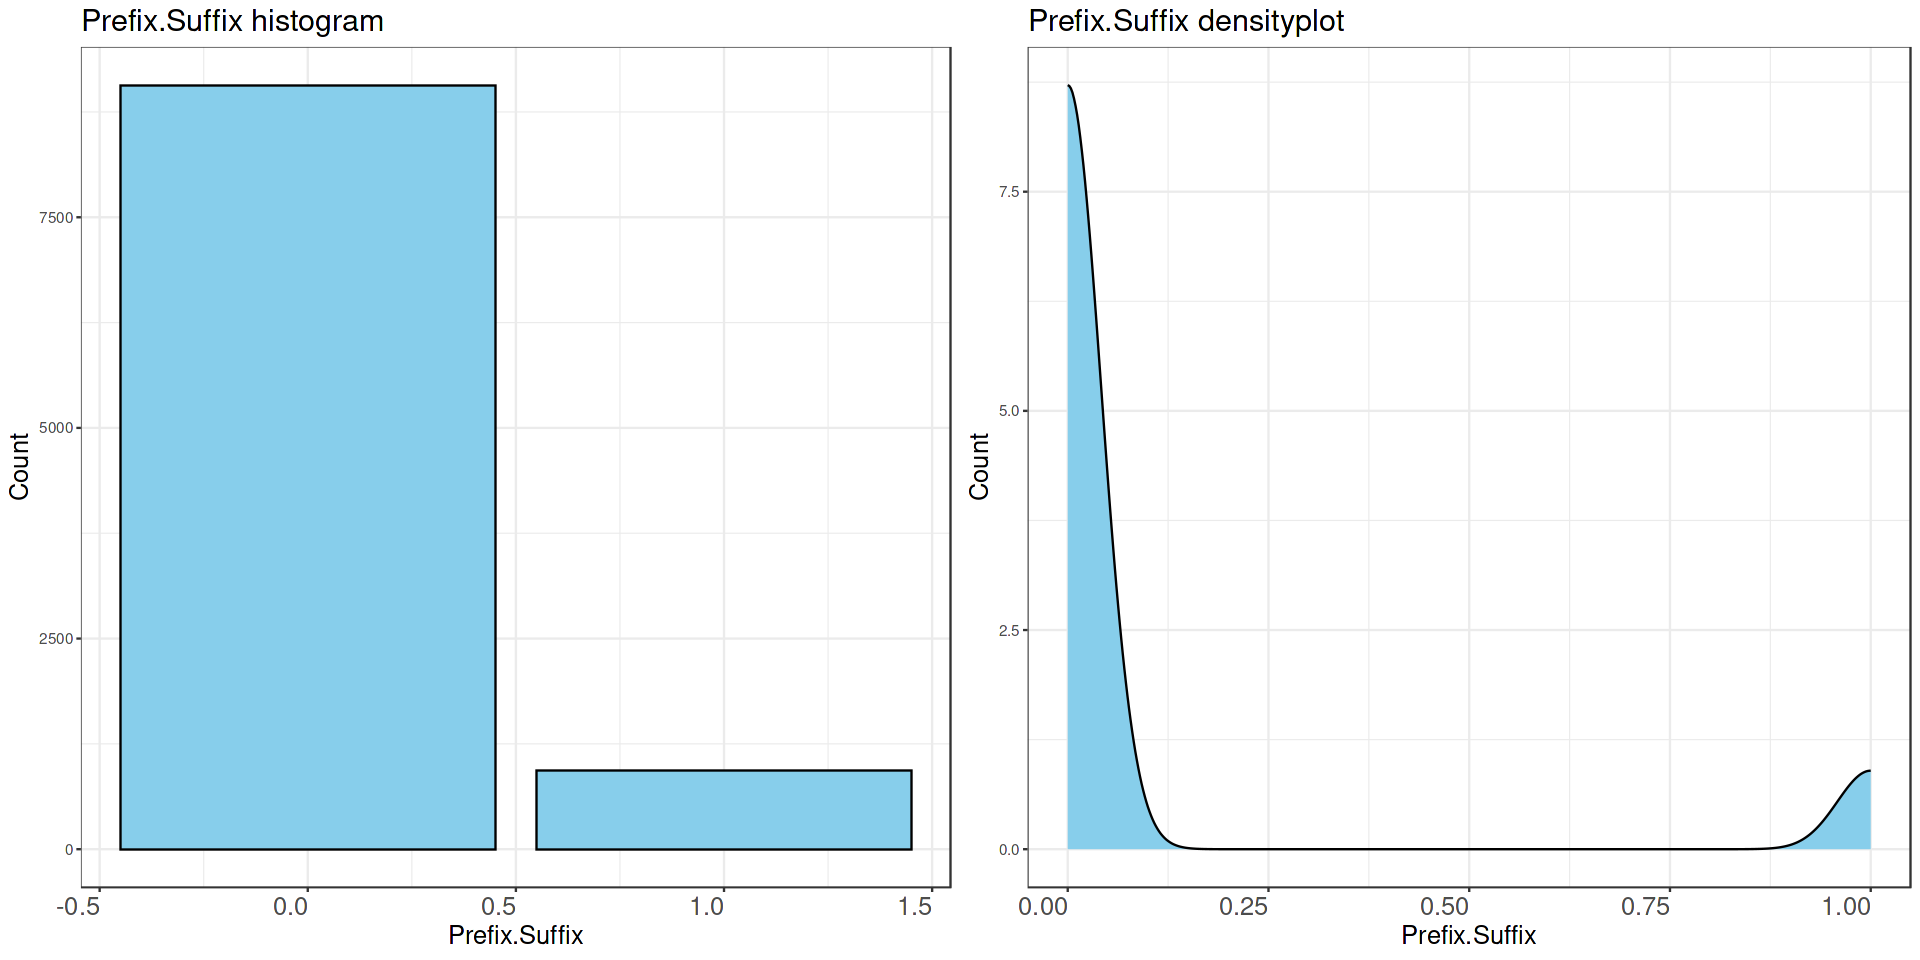

Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


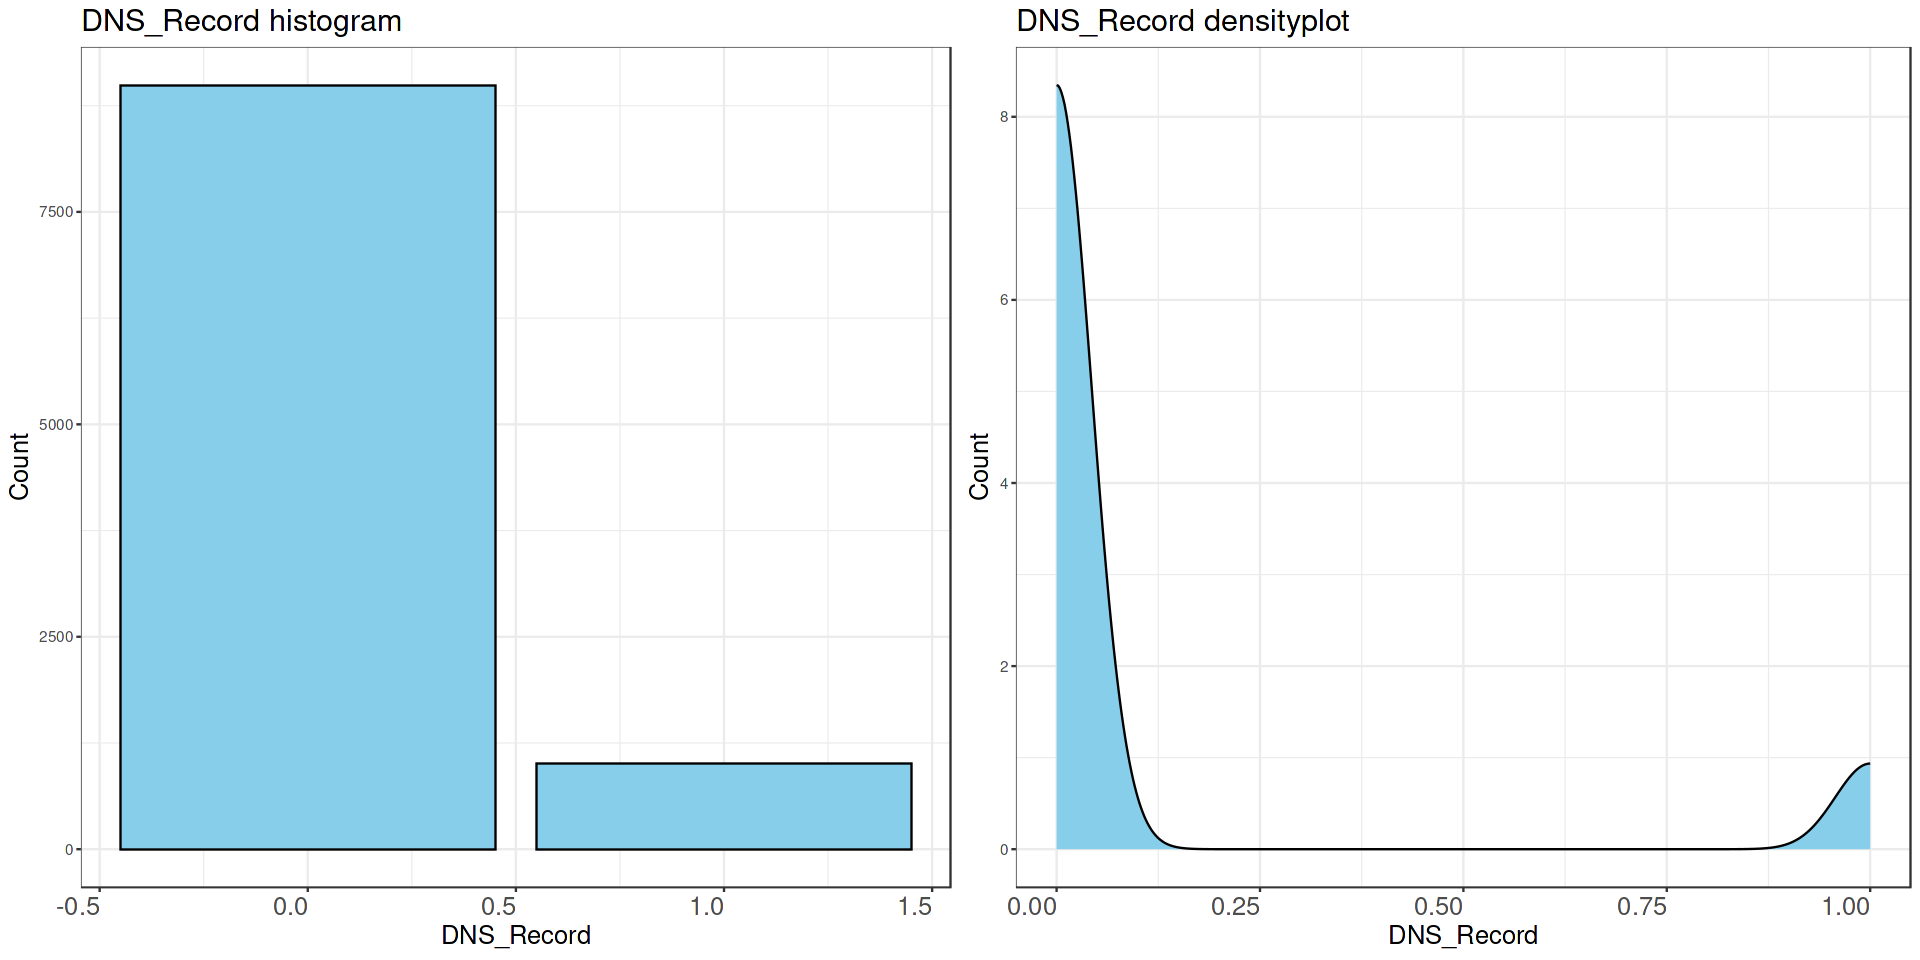

Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


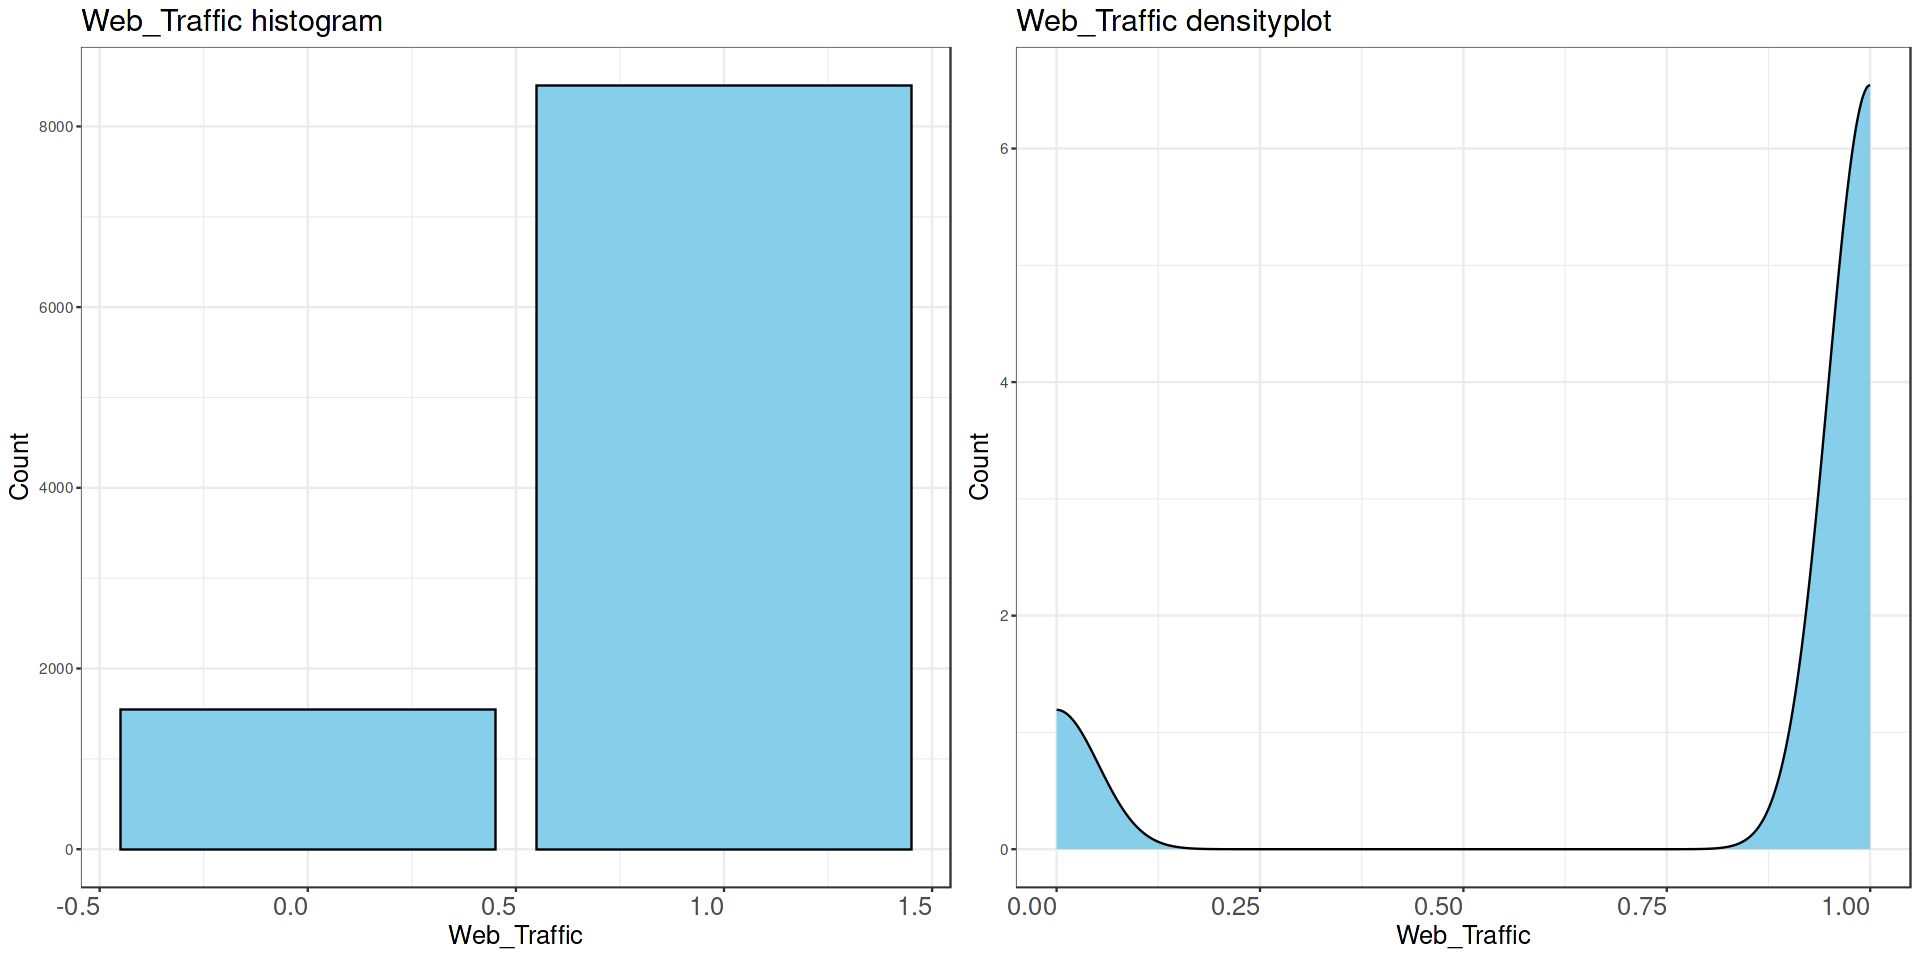

Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


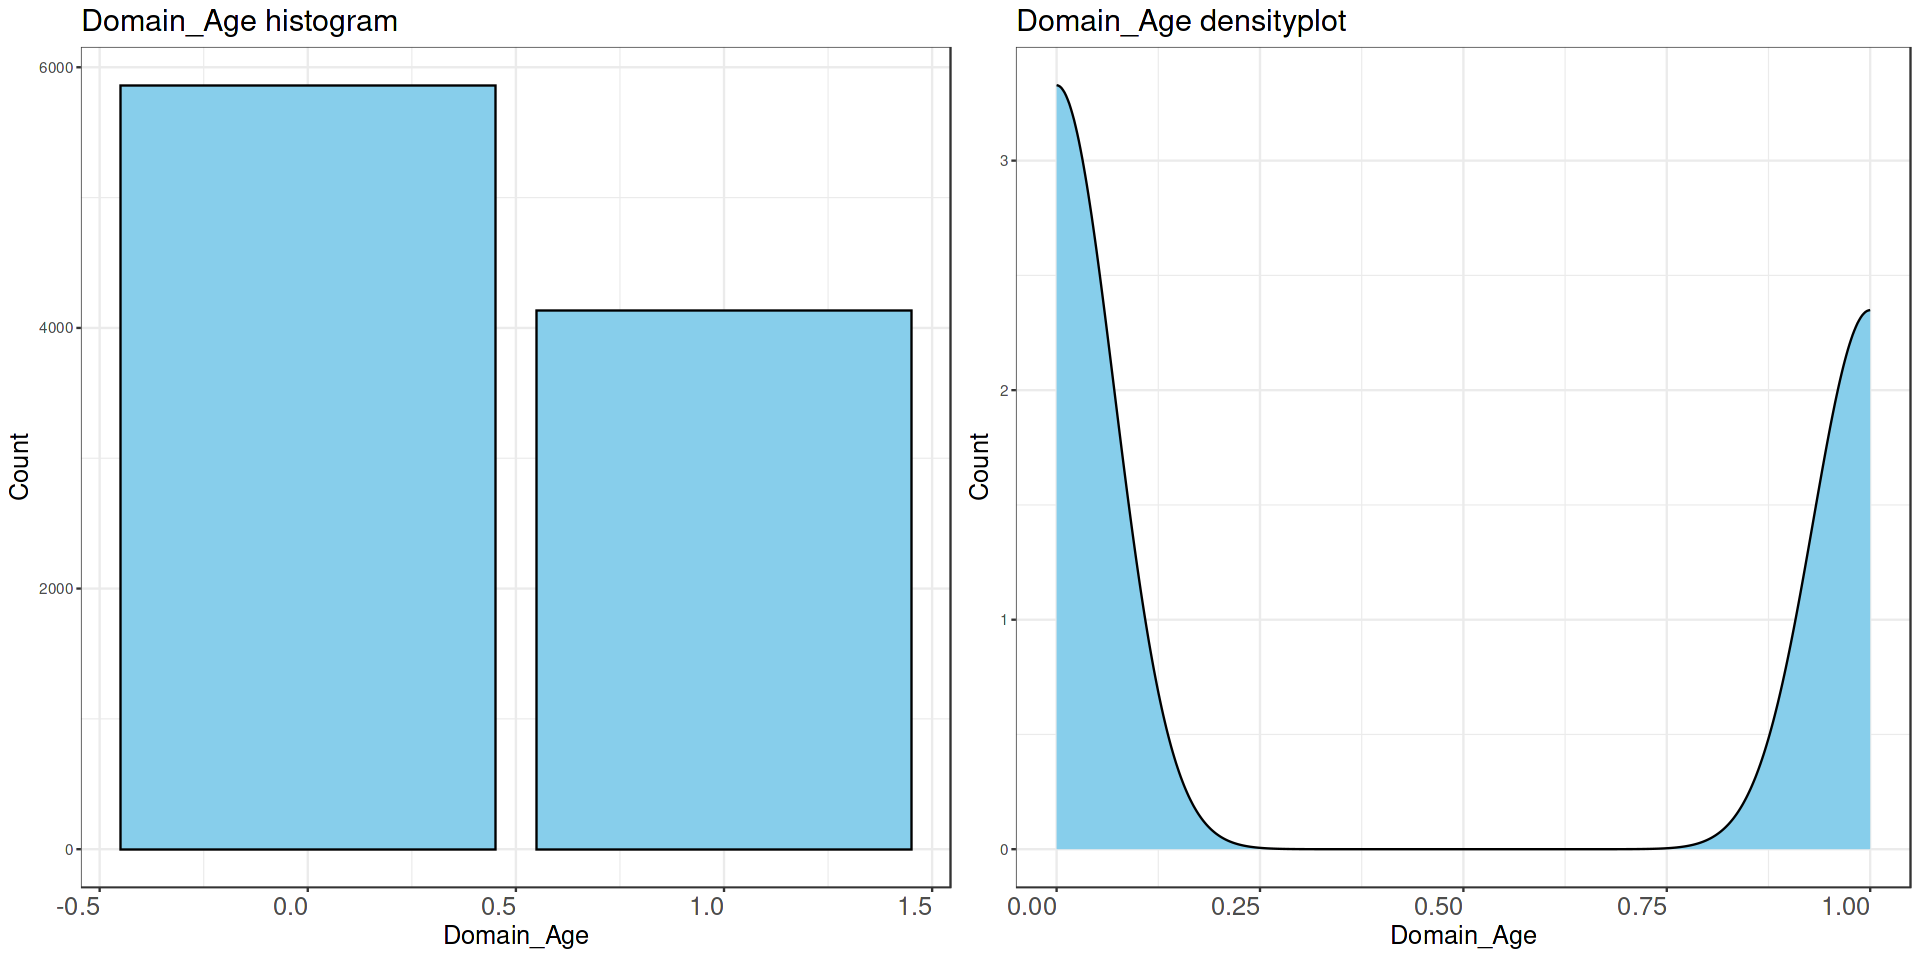

Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


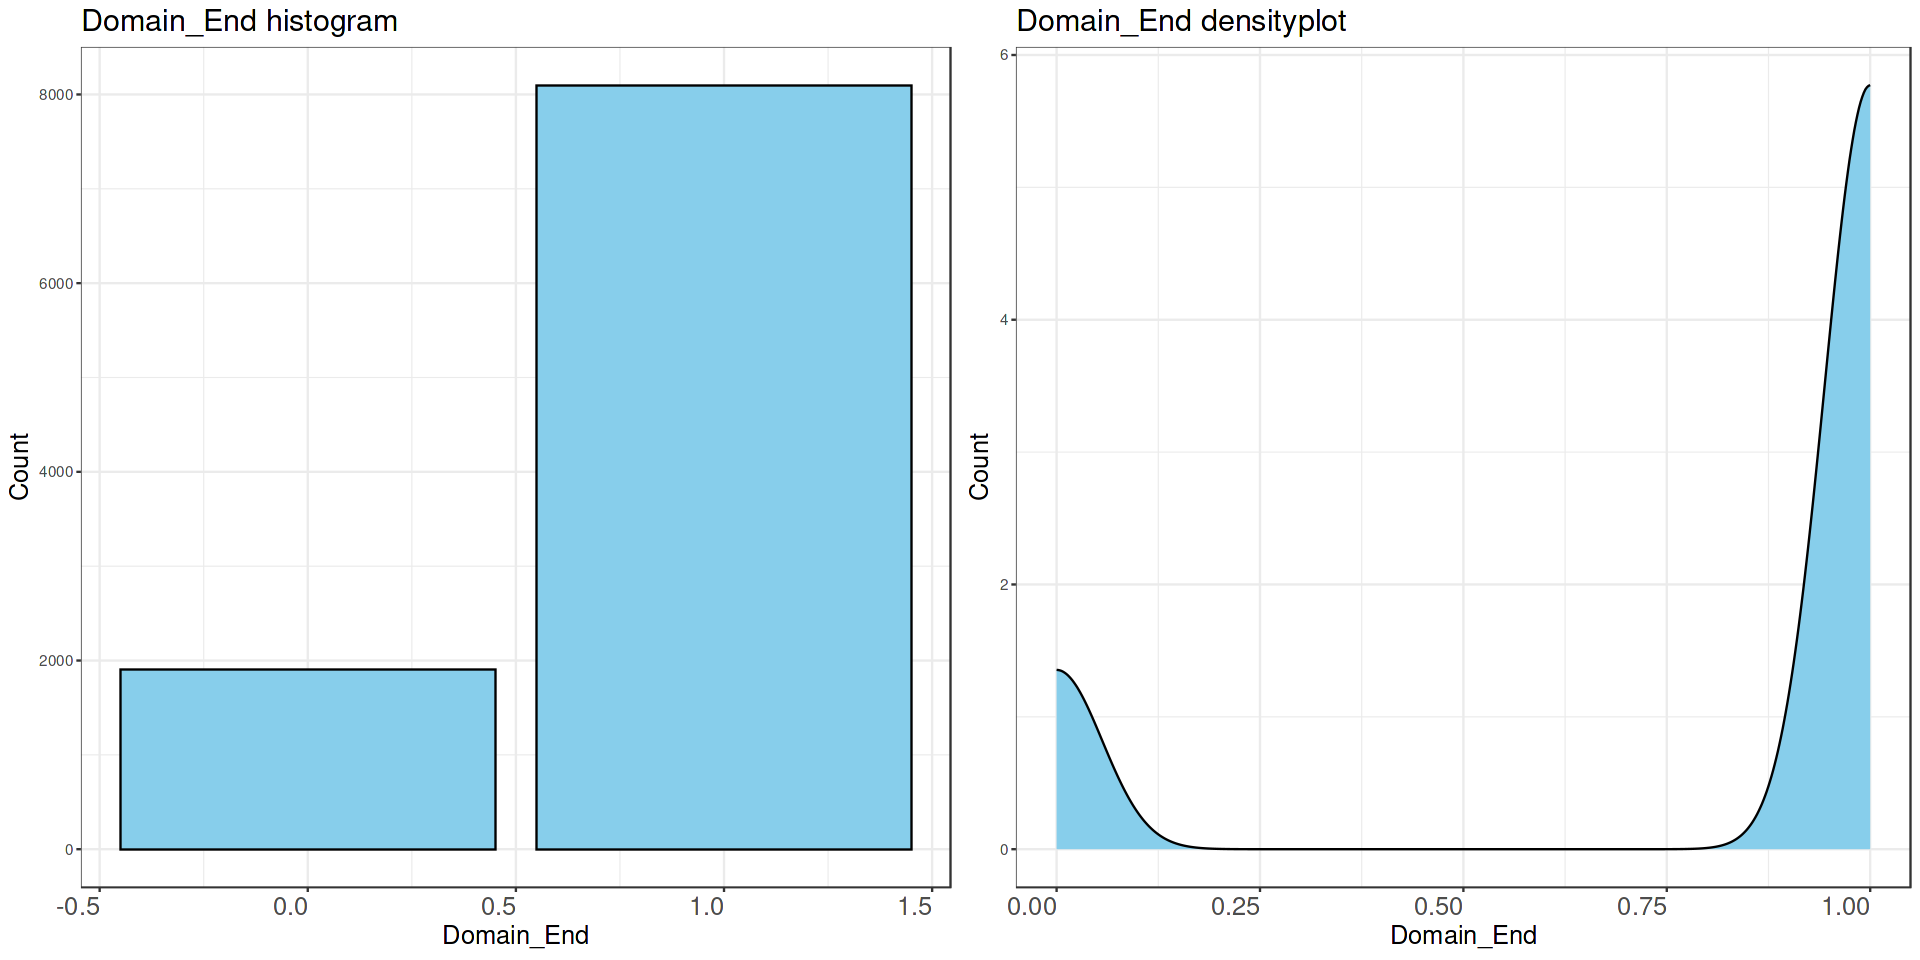

Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


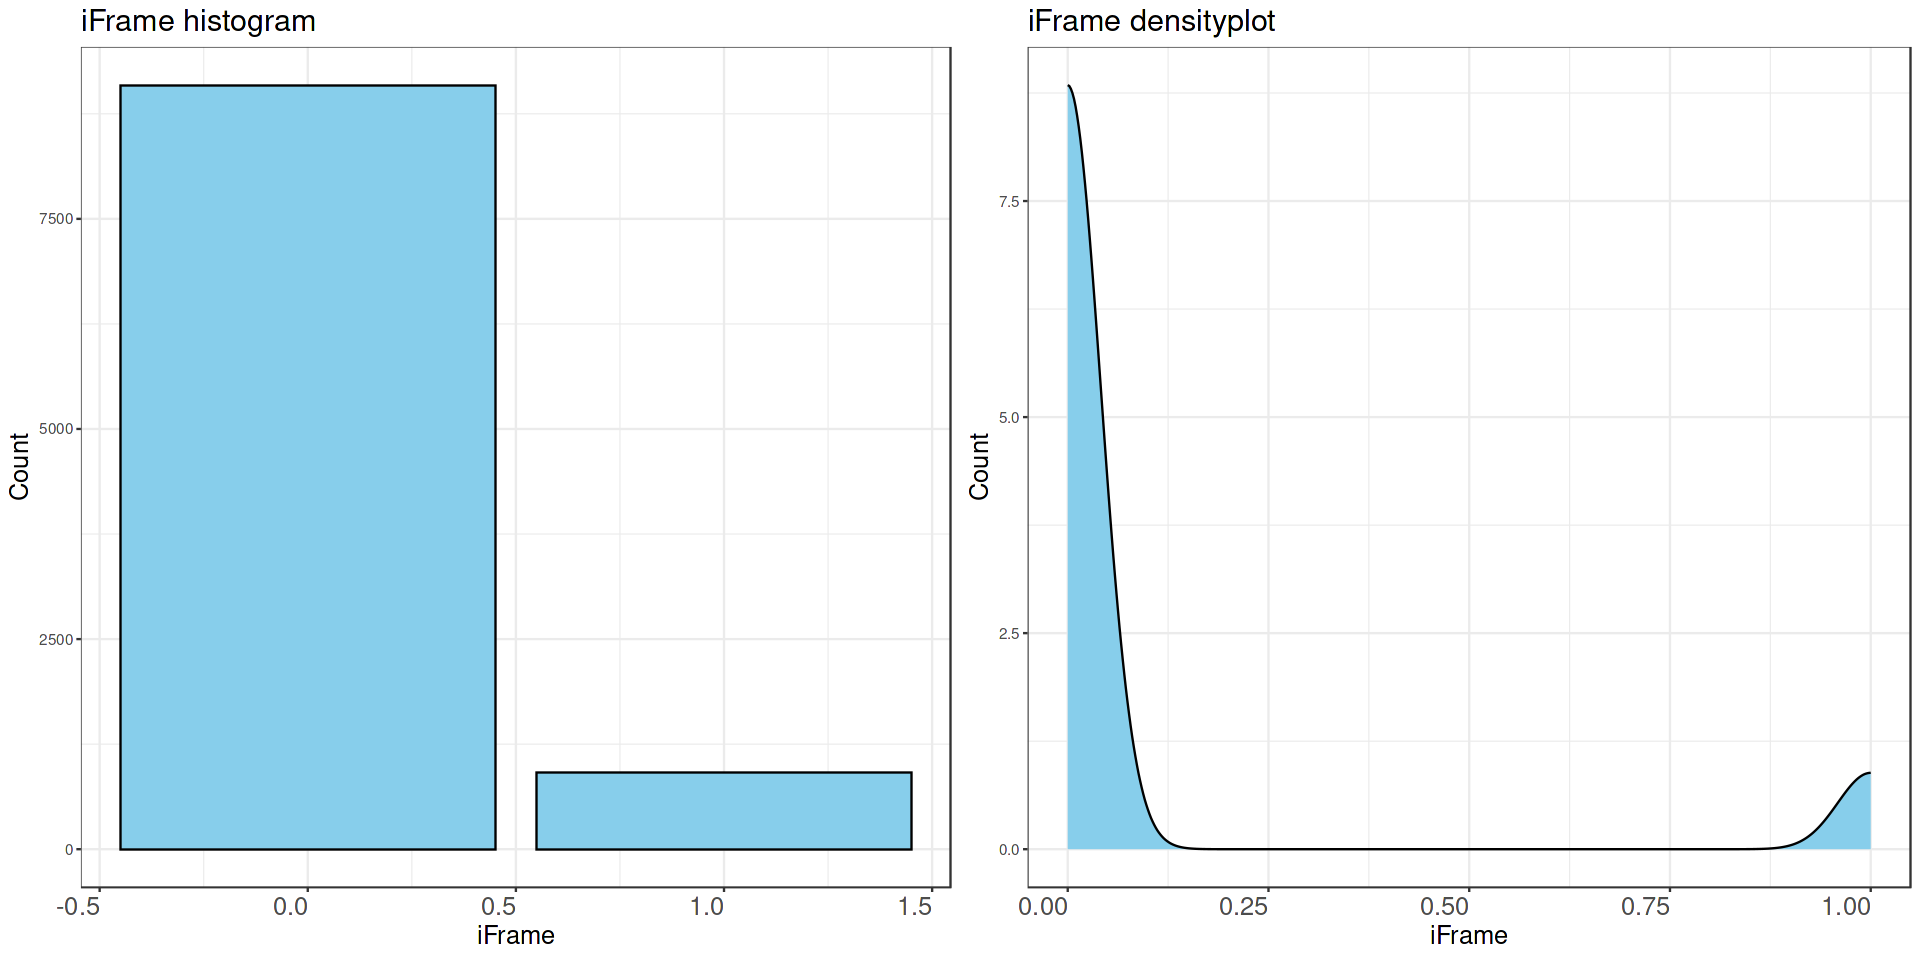

Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


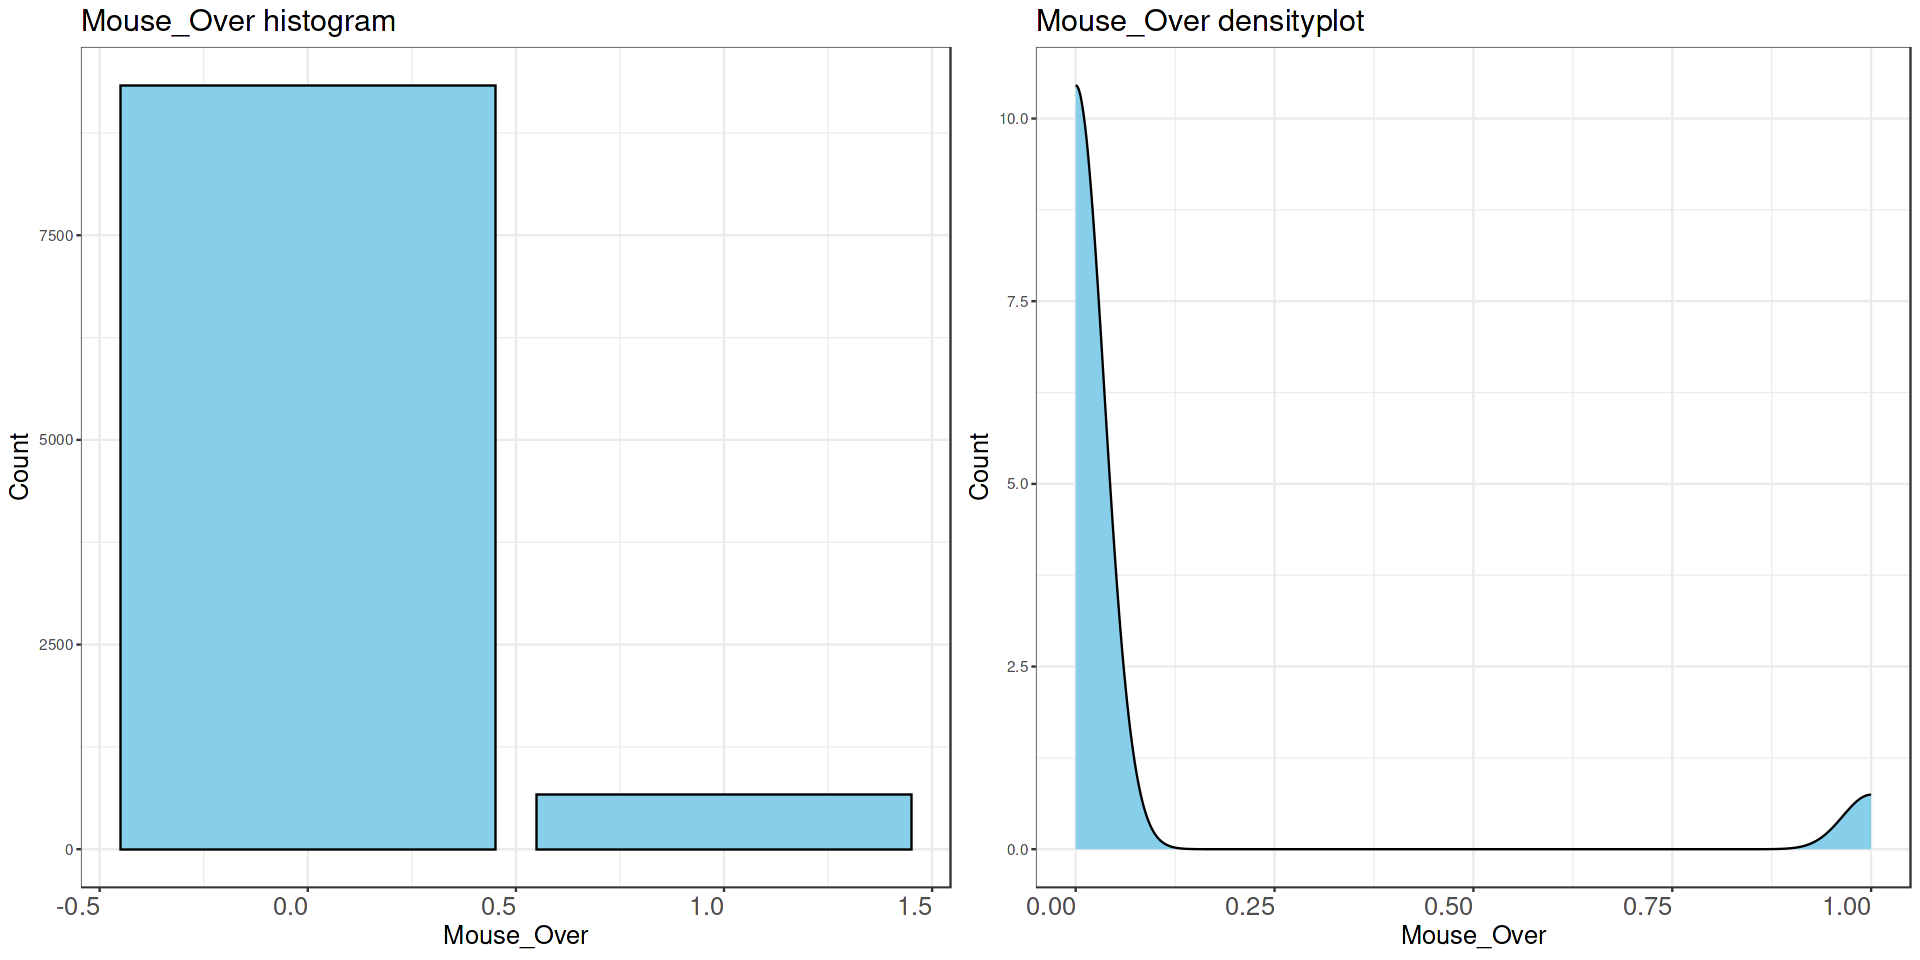

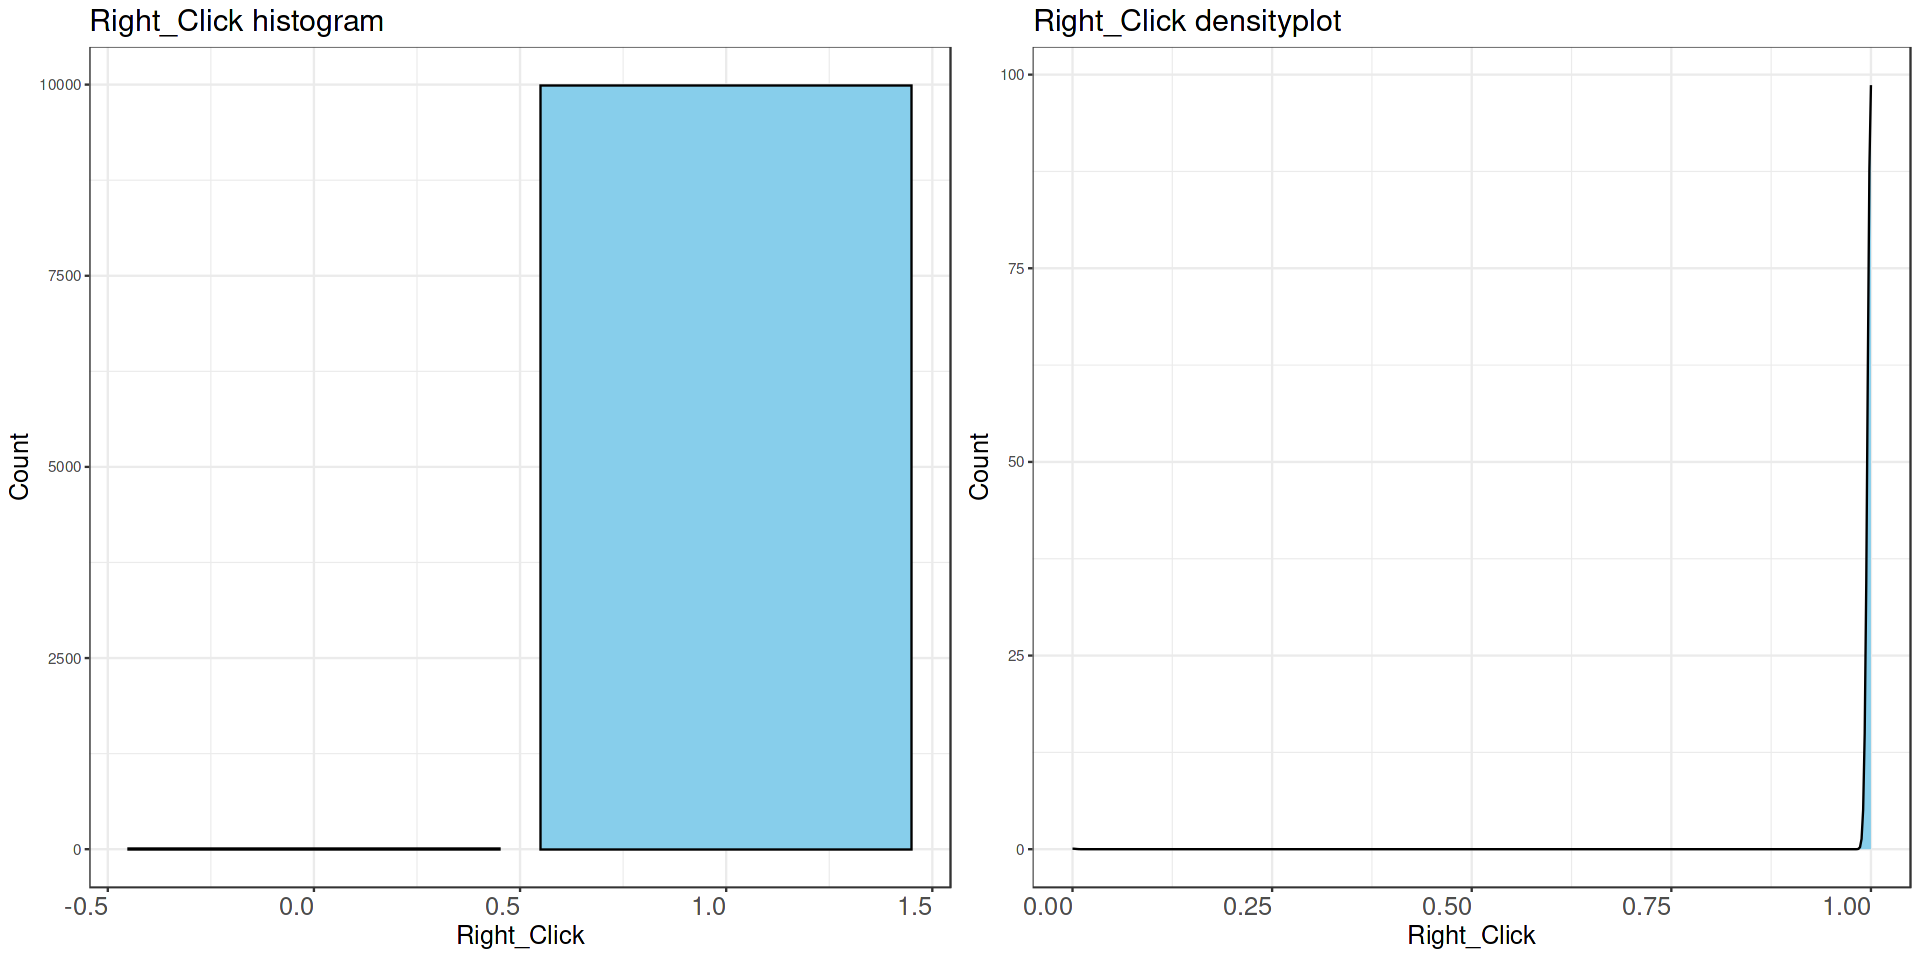

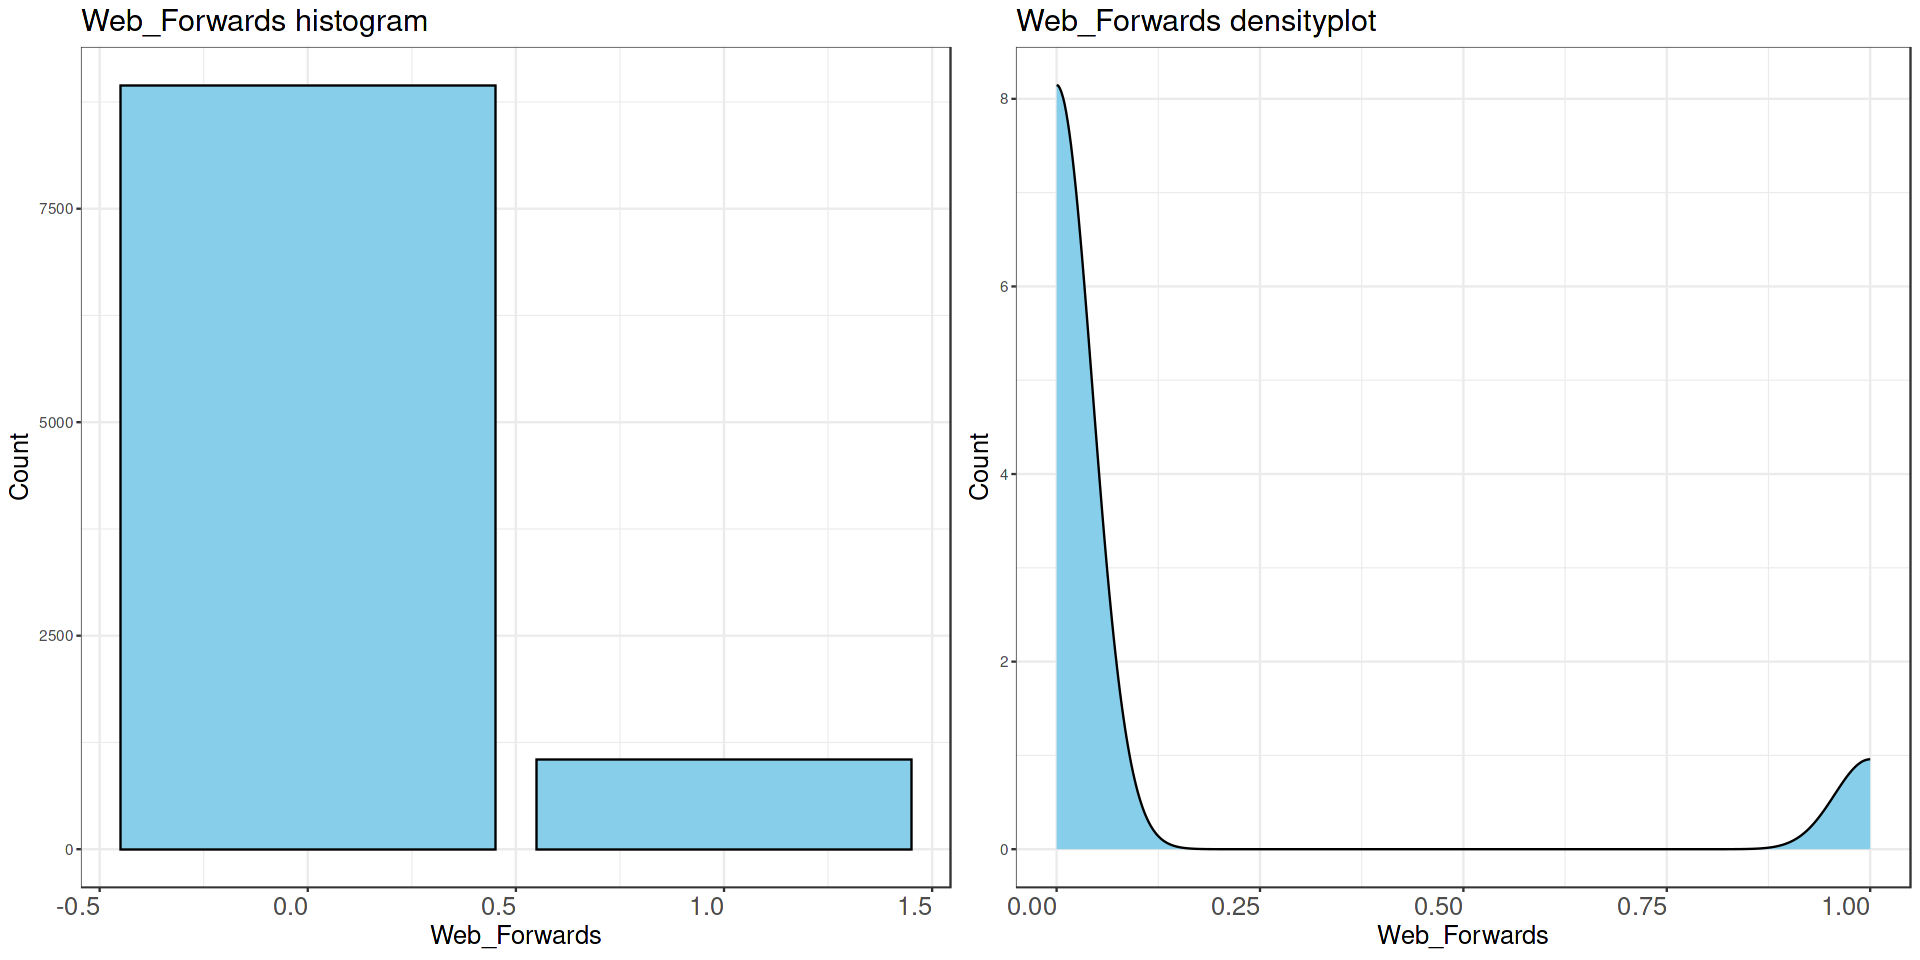

In [182]:
for(i in 2:length(num_cols)){
    a <- ggplot(df) + geom_histogram(aes(x= df[,i]), fill = 'skyblue', col = 'black', position = 'dodge', stat="count") + 
            labs(title = paste0(names(df[i]),' histogram'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )
    
    b <- ggplot(df) + geom_density(aes(x= df[,i]), fill = 'skyblue') + 
            labs(title = paste0(names(df[i]),' densityplot'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            ) 
    grid.arrange(a,b , ncol = 2)    
}

# **Correlation**

In [183]:
options(repr.plot.width = 16.0, repr.plot.height = 16.0)

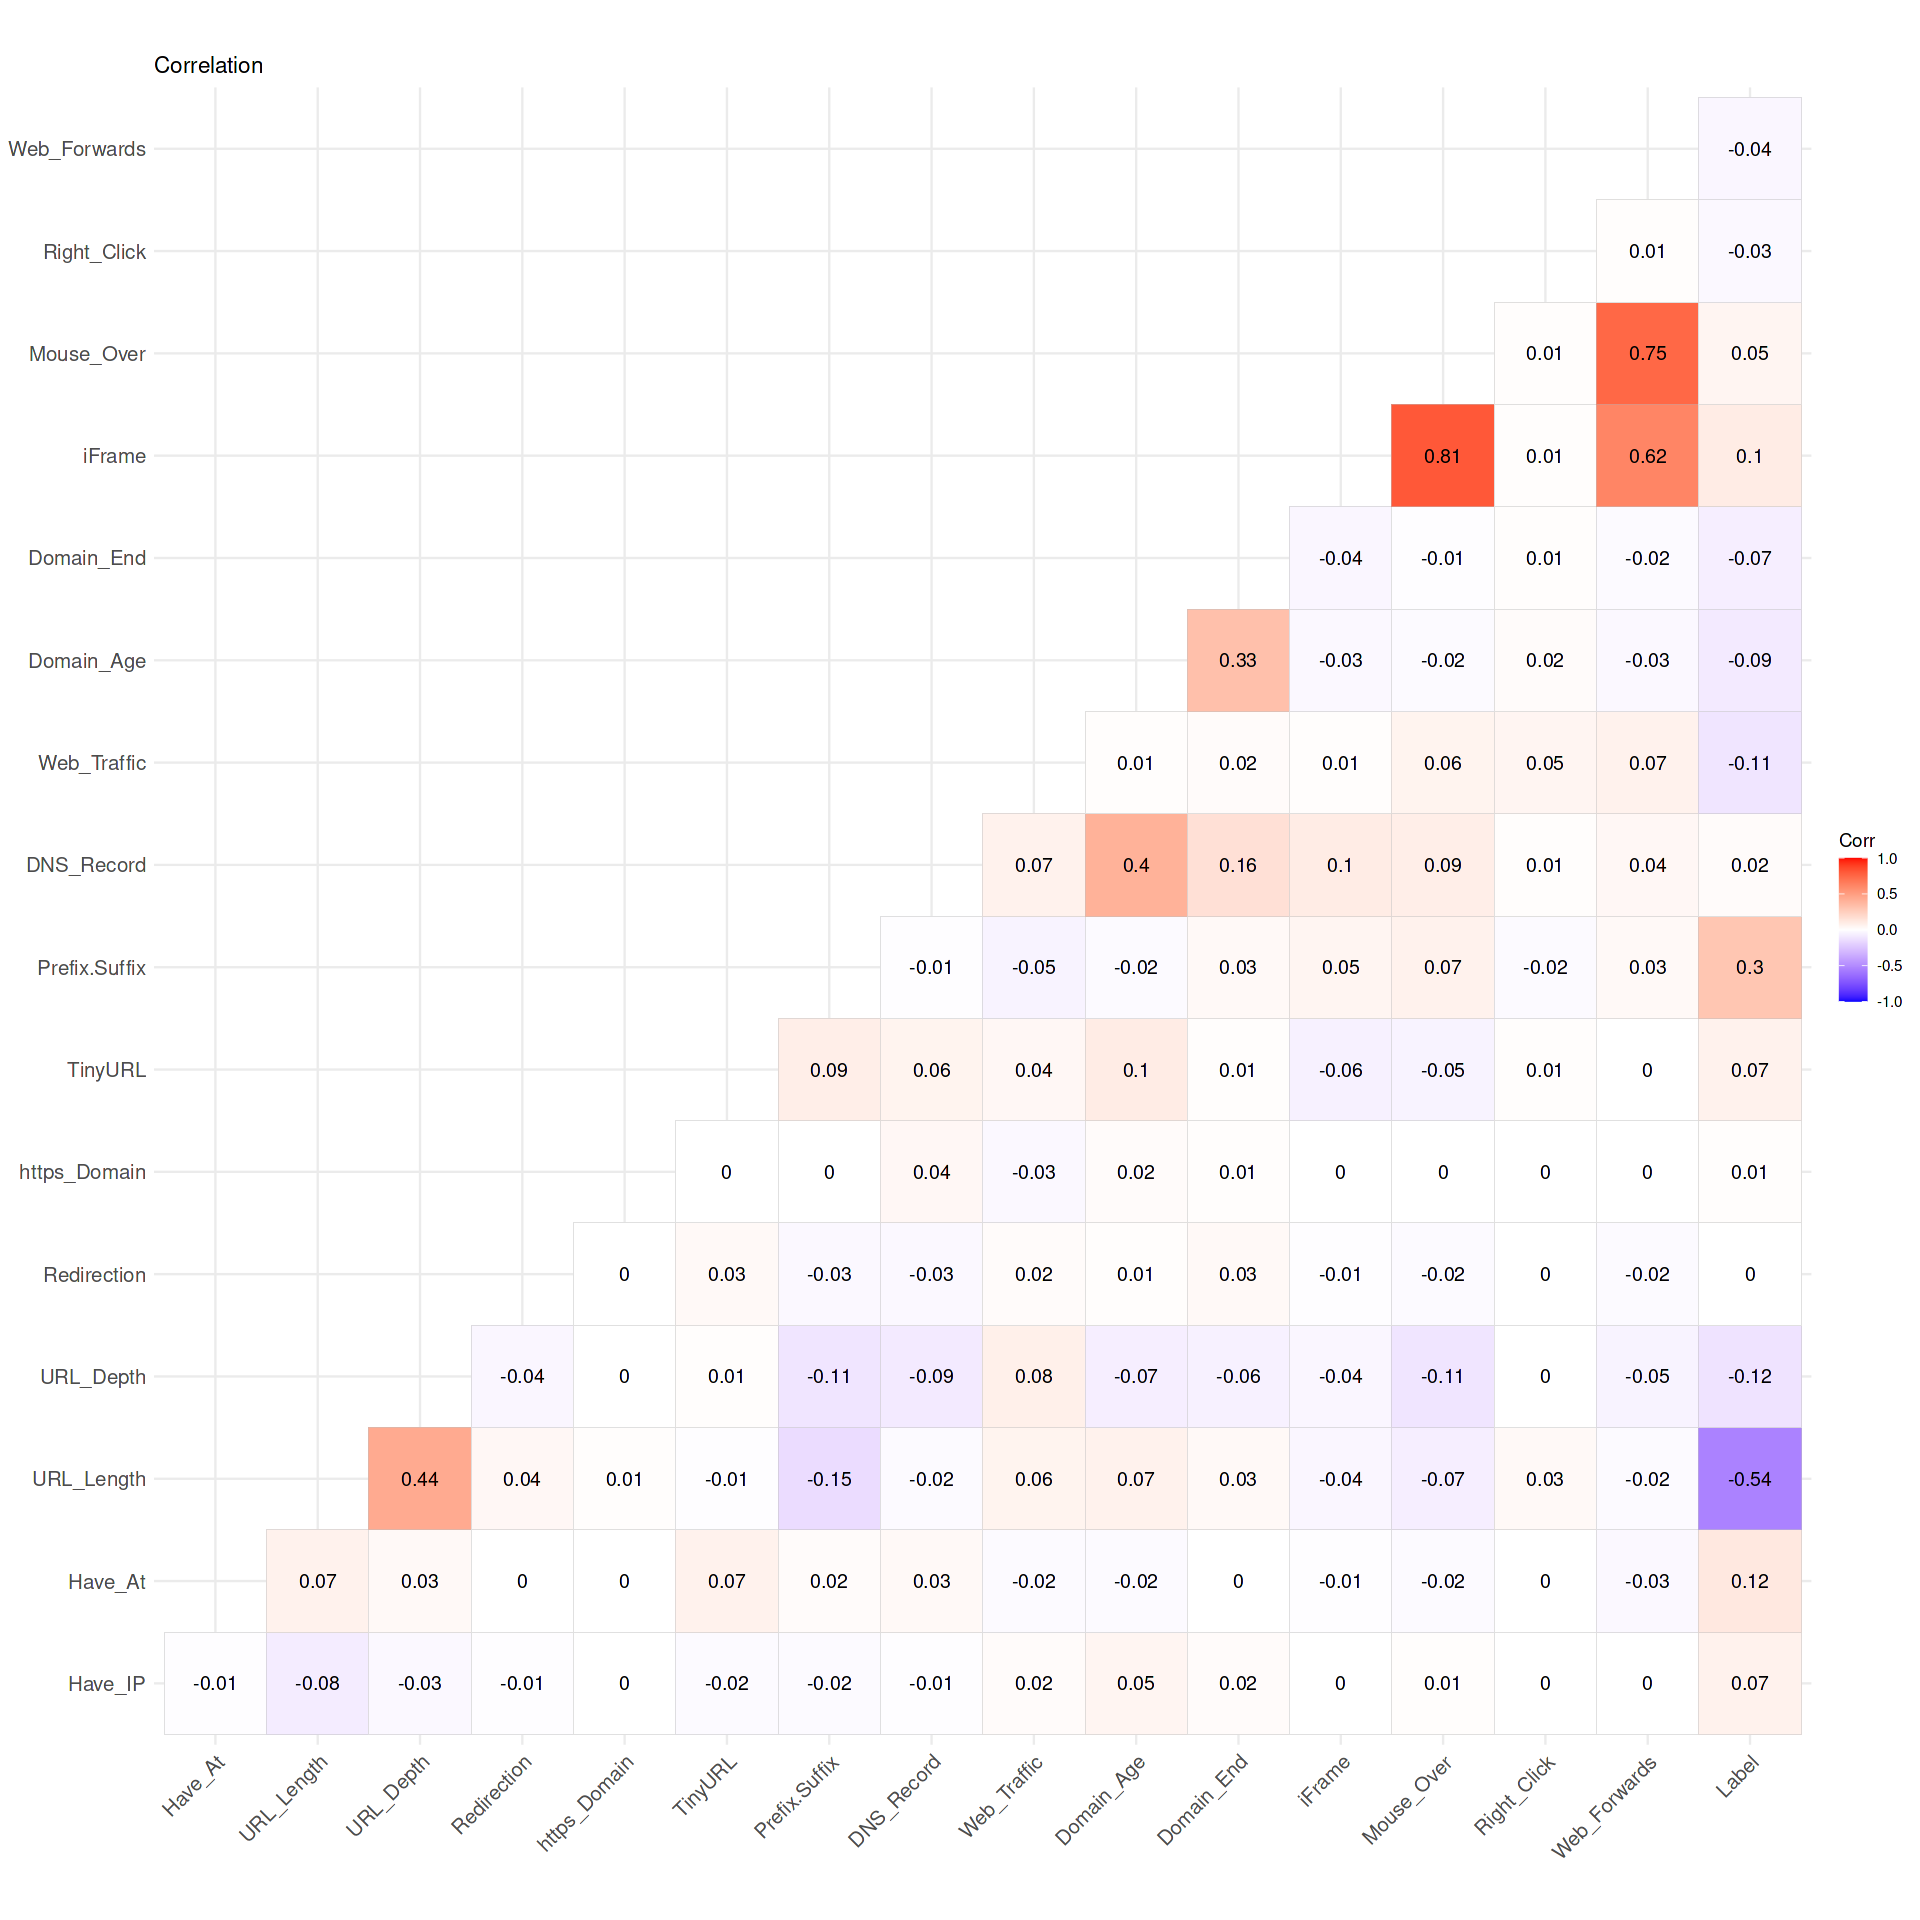

In [184]:
ggcorrplot(cor(df[num_cols]) , type = "lower", lab=T, title = 'Correlation')

# **3. Modeling**

In [185]:
library(tidymodels)
library(finetune)
library(xgboost)
library(bonsai)
library(themis)
library(caret)
library(withr)
library(Metrics)
library(Matrix)
library(mltools)
library(data.table)

## **Data Preprocessing**

In [186]:
df <- df[,-1]

**Matrix Transformation for xgb Models**

In [187]:
df_xgb <- sparse.model.matrix(Label ~. , data = df)

## **Train Test Split**

In [188]:
idx <- sample(1:nrow(df_xgb), 0.7 * nrow(df_xgb))

In [189]:
train_x <- df_xgb[idx,]
test_x <- df_xgb[-idx,]

train_y <- df[idx, 'Label']
test_y <- df[-idx, 'Label']

In [190]:
dtrain <- xgb.DMatrix(data = train_x, label = as.matrix(train_y))
dtest <- xgb.DMatrix(data = test_x, label = as.matrix(test_y))

## **Parameter**

In [191]:
param <- list(max_depth = 5,
              eta = 0.1,
              verbose = 0,
              nthread = 2,
              objective = 'binary:logistic',
              eval_metric = 'auc'
            )

## **Modeling**

In [192]:
xgb_model <- xgb.train(params = param, data = dtrain, nround = 10, subsample = 0.5, colsample_bytree = 0.5 ,num_class = 1)

[09:39:14] WARNING: src/learner.cc:767: 
Parameters: { "verbose" } are not used.



## **Prediction**

In [209]:
y_pred <- predict(xgb_model , dtest, type = 'class')

In [212]:
y_pred <- ifelse(y_pred > 0.5,1,0)

## **ConfusionMatrix**

In [213]:
cm <- confusionMatrix(factor(y_pred), factor(test_y))
cm

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1442  491
         1   36 1031
                                          
               Accuracy : 0.8243          
                 95% CI : (0.8102, 0.8378)
    No Information Rate : 0.5073          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6501          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9756          
            Specificity : 0.6774          
         Pos Pred Value : 0.7460          
         Neg Pred Value : 0.9663          
             Prevalence : 0.4927          
         Detection Rate : 0.4807          
   Detection Prevalence : 0.6443          
      Balanced Accuracy : 0.8265          
                                          
       'Positive' Class : 0               
                        

## **HeatMap**

In [214]:
xgb_cm <- data.frame(cm$table)

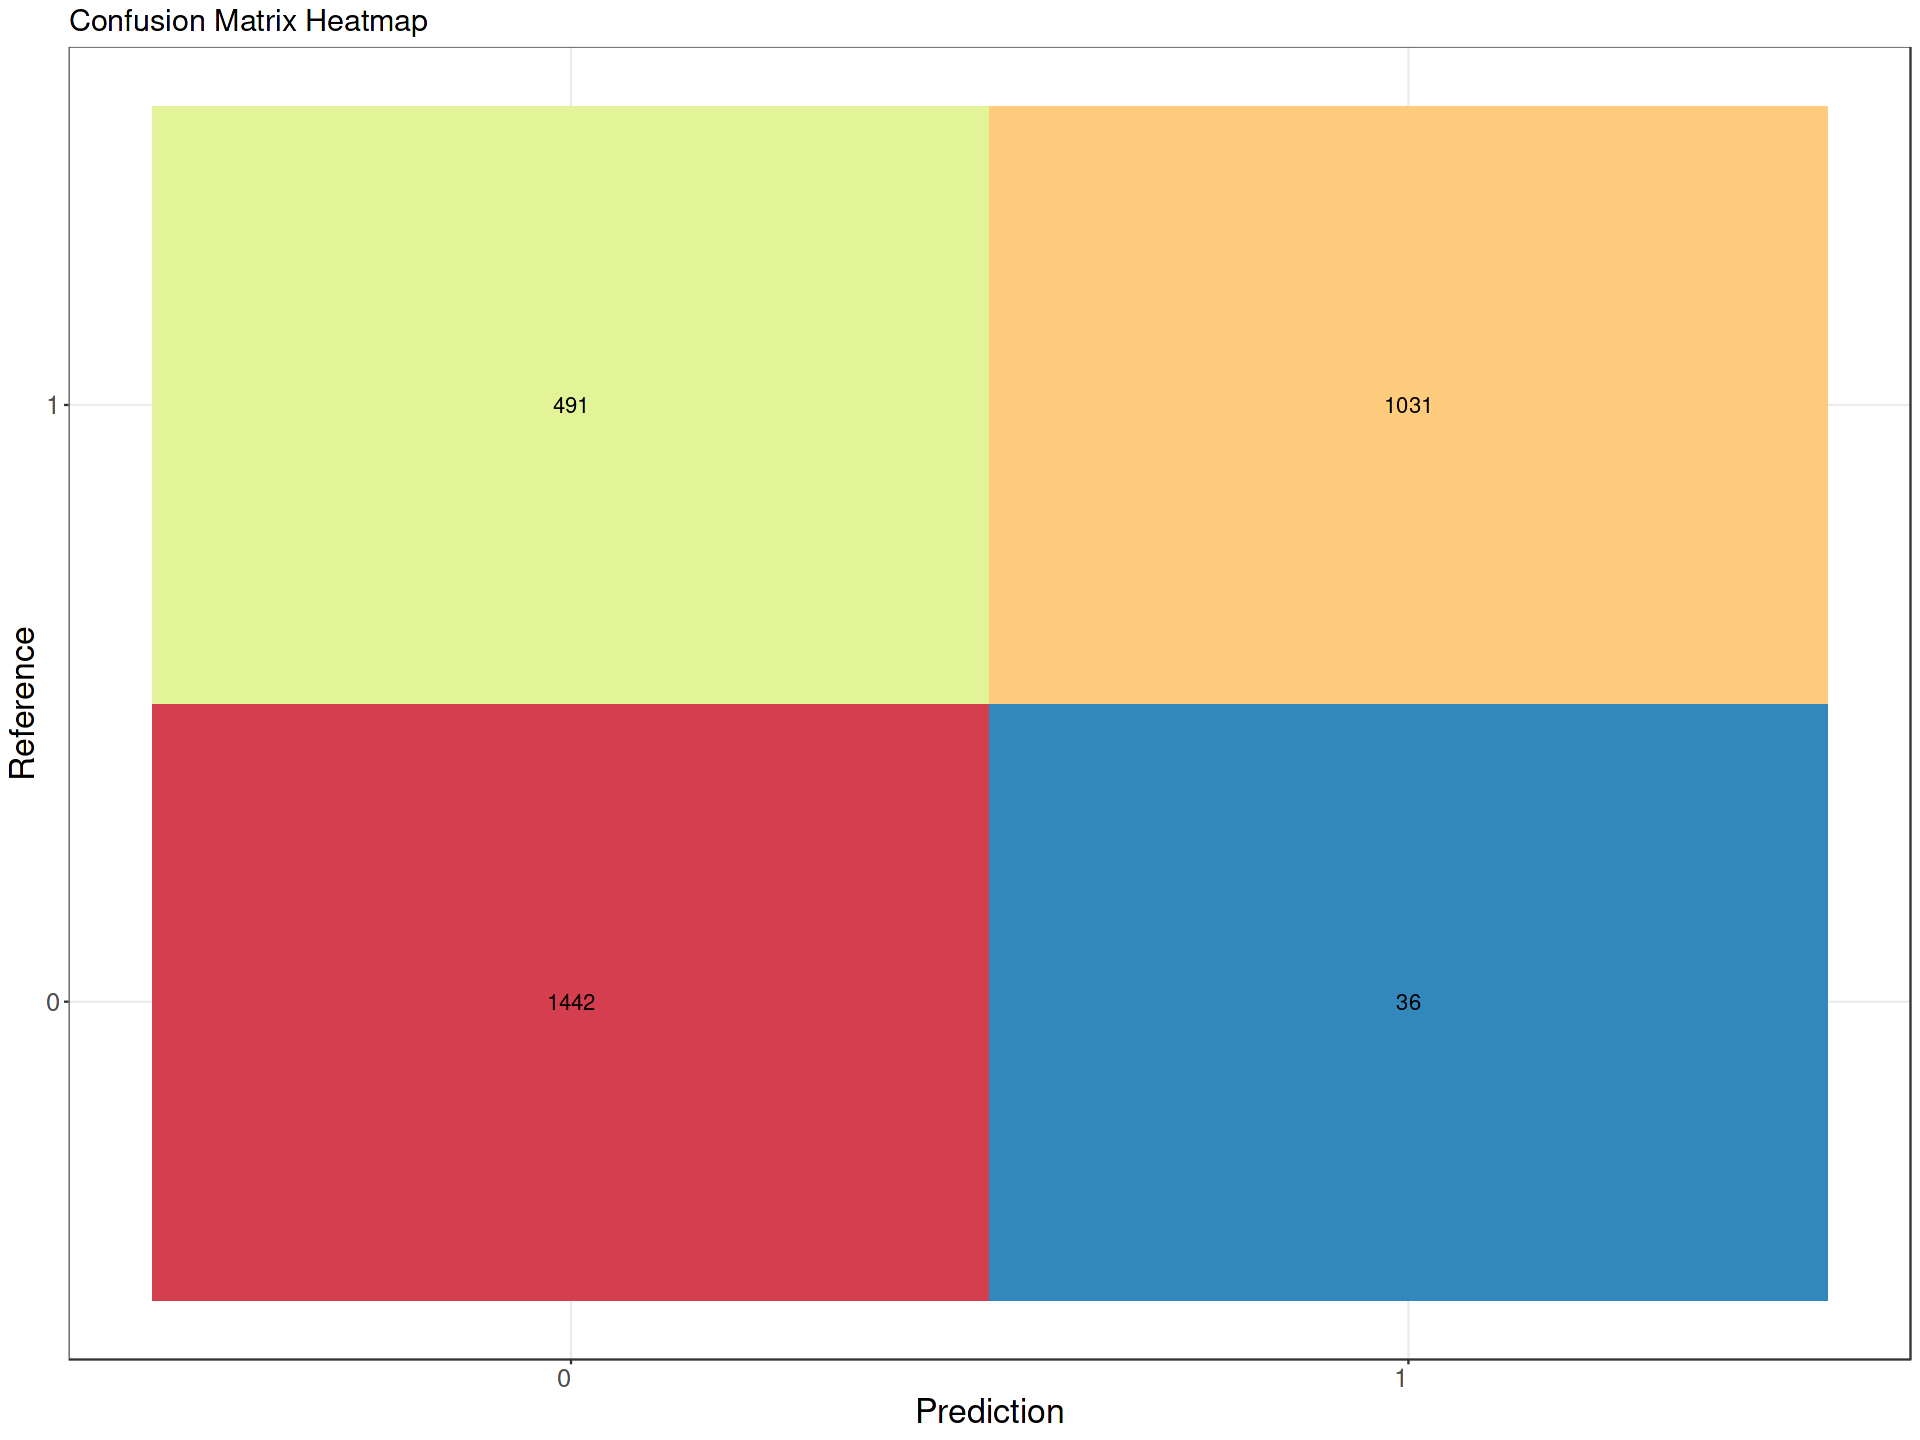

In [215]:
ggplot(xgb_cm) + geom_tile(aes(x=Prediction, y= Reference, fill = Freq)) +
                geom_text(aes(x= Prediction, y= Reference , label = Freq, size = 40), alpha = 5,) +
                scale_fill_distiller(palette = 'Spectral')+
                ggtitle('Confusion Matrix Heatmap') +
                theme_bw() +
                theme(
                legend.position = 'none',
                axis.title = element_text(size=20),
                axis.text.x = element_text(size = 15, hjust=1),
                axis.text.y = element_text(size = 15, hjust=1),
                title = element_text(size=15)
                )

# **4. Evaulation**

In [216]:
feature <- dimnames(dtrain)[[2]]

In [217]:
importance <- xgb.importance(feature,model = xgb_model)

In [221]:
options(scipen = 10)

In [222]:
importance

Feature,Gain,Cover,Frequency,Importance
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
URL_Length,0.41426805059,0.069027106,0.03225806,0.41426805059
Prefix.Suffix,0.23143867583,0.149270088,0.07526882,0.23143867583
URL_Depth,0.19756708817,0.309726563,0.32258065,0.19756708817
Have_At,0.04359387877,0.094211005,0.06451613,0.04359387877
iFrame,0.02774820895,0.098508374,0.08602151,0.02774820895
Web_Traffic,0.01887238077,0.048932396,0.05376344,0.01887238077
Web_Forwards,0.01585934519,0.021446530,0.04301075,0.01585934519
Have_IP,0.01368986814,0.089990605,0.06451613,0.01368986814
Domain_End,0.01295383708,0.023866126,0.06451613,0.01295383708


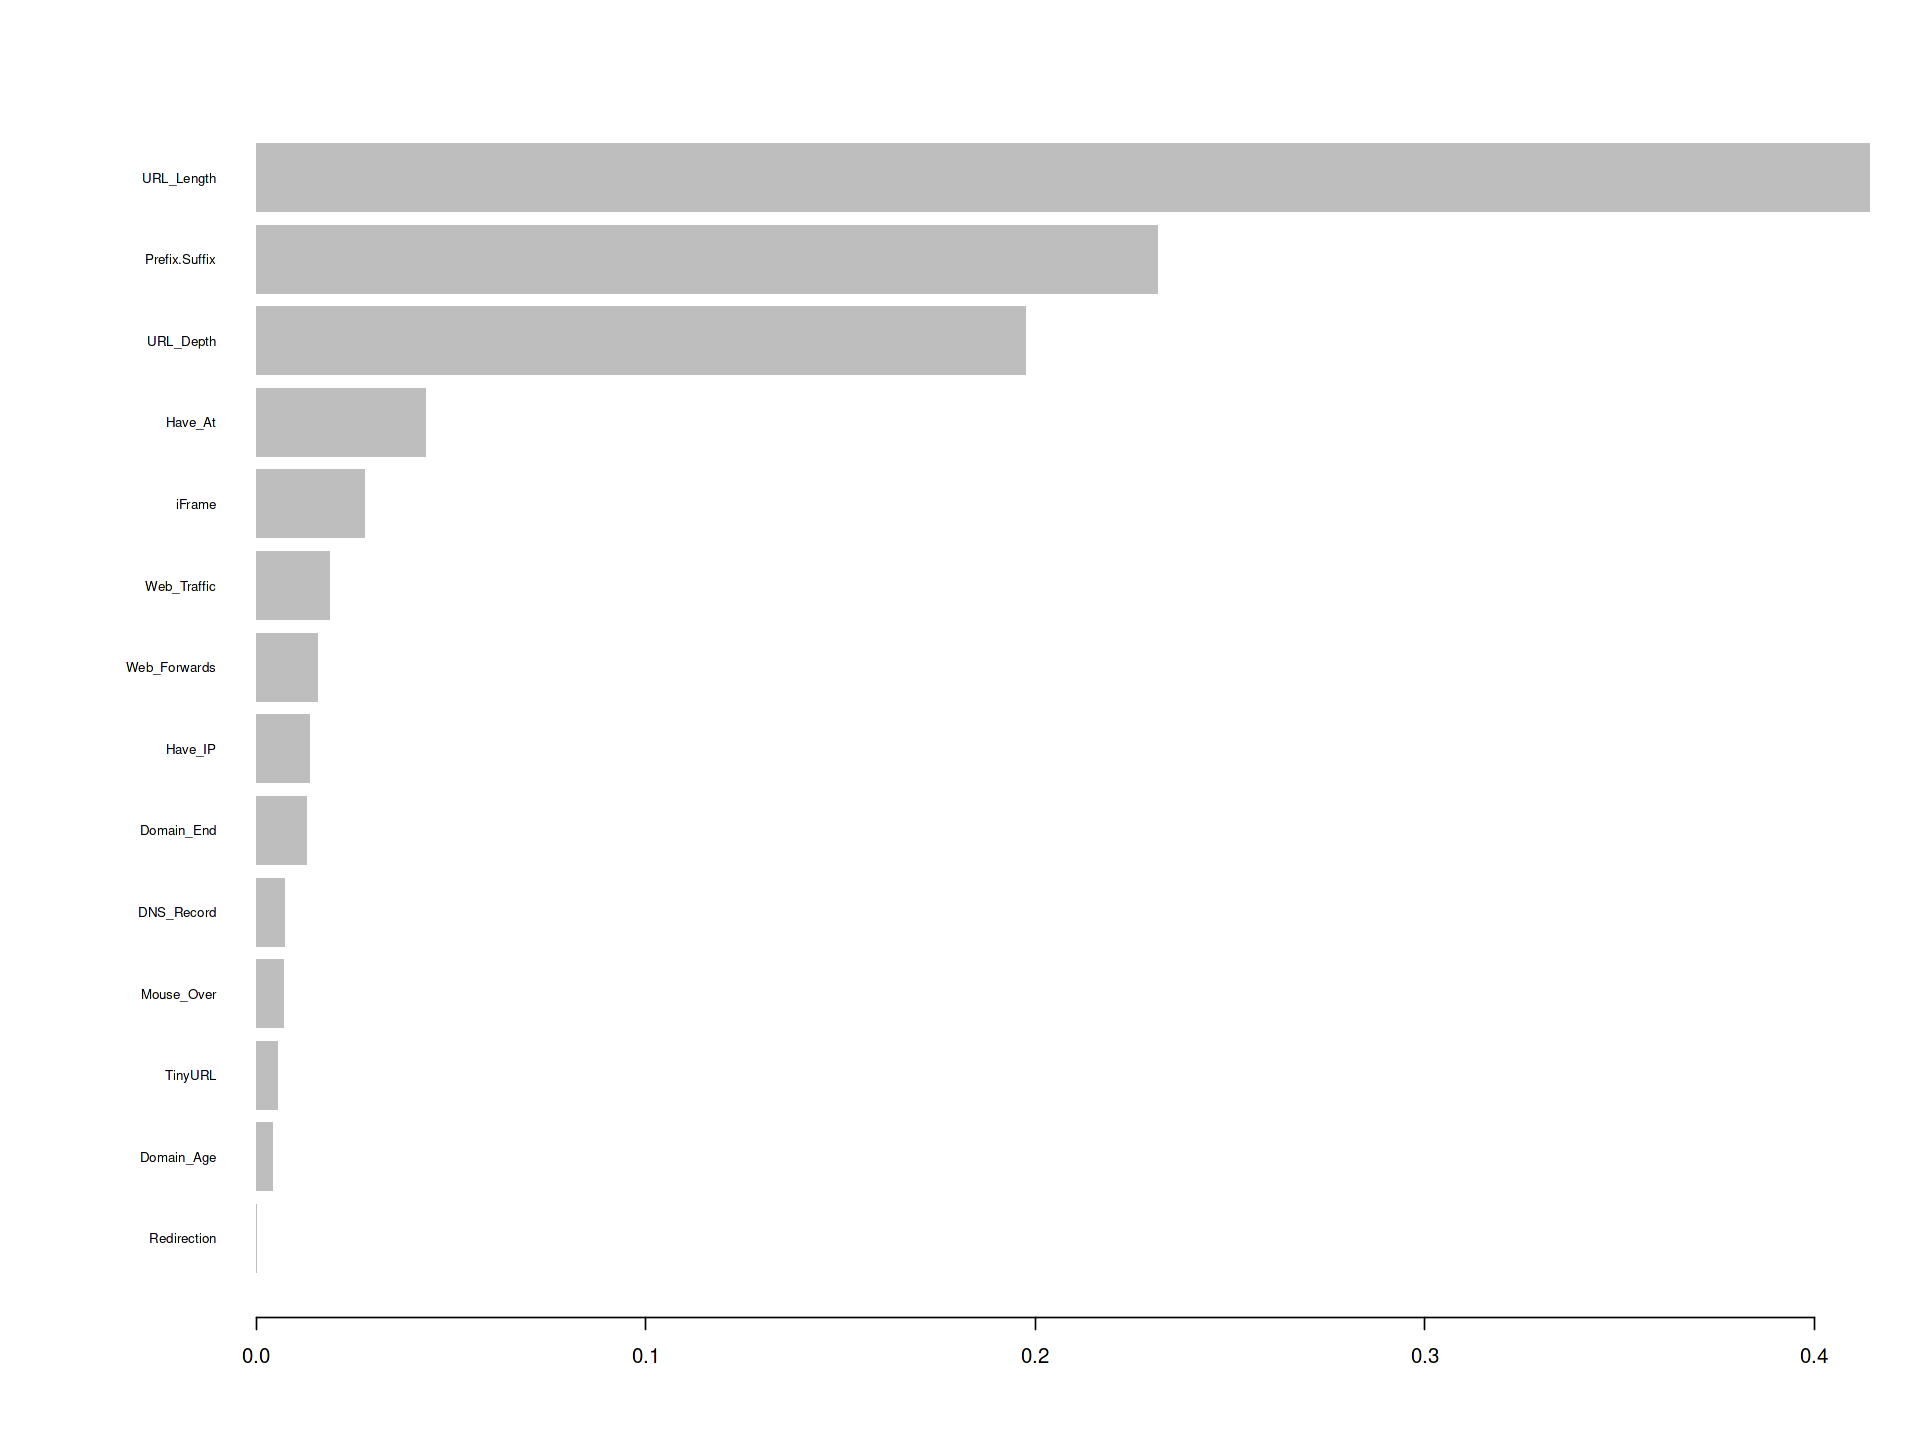

In [223]:
options(repr.plot.width = 16.0, repr.plot.height = 12.0)
xgb.plot.importance(importance)

**Thankyou. Please leave your advice in the comments**